In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jorgecarballorocha/enfermedades-contagiosas-mexico-2025-normalizado")

print("Path to dataset files:", path)

100%|██████████| 1.86M/1.86M [00:00<00:00, 22.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jorgecarballorocha/enfermedades-contagiosas-mexico-2025-normalizado/versions/1


In [2]:
# prompt: imprime el df

import pandas as pd

df = pd.read_csv(path + '/enfermedades_contagiosas_mexico_2025_normalizado.csv')
print(df.head())

  fecha_sintomas  edad  sexo  entidad_res  municipio_res  embarazo  \
0     2024-01-25    31     2            9              3        97   
1     2025-04-20     8     2            1              3        97   
2     2024-01-01    29     1            9              7         2   
3     2024-01-02     1     2           32             56        97   
4     2024-01-02    55     1           19             26         2   

   habla_lengua_indigena  diabetes  asma  hipertension defuncion  diagnostico  \
0                      2         2     2             2       NaN            7   
1                      2         2     2             2       NaN            6   
2                      2         2     2             2       NaN            7   
3                      2         2     2             2       NaN            7   
4                      2         2     2             2       NaN            7   

  tipo_enfermedad  defuncion_binaria  asma_isnull  fecha_sintomas_isnull  
0    respiratoria

In [3]:
df['defuncion'] = pd.to_datetime(
    df['defuncion'],
    errors='coerce',
    format='%Y-%m-%d',
)

df['defuncion_isnull'] = df['defuncion'].isna().astype(int)
print(df.head())

  fecha_sintomas  edad  sexo  entidad_res  municipio_res  embarazo  \
0     2024-01-25    31     2            9              3        97   
1     2025-04-20     8     2            1              3        97   
2     2024-01-01    29     1            9              7         2   
3     2024-01-02     1     2           32             56        97   
4     2024-01-02    55     1           19             26         2   

   habla_lengua_indigena  diabetes  asma  hipertension defuncion  diagnostico  \
0                      2         2     2             2       NaT            7   
1                      2         2     2             2       NaT            6   
2                      2         2     2             2       NaT            7   
3                      2         2     2             2       NaT            7   
4                      2         2     2             2       NaT            7   

  tipo_enfermedad  defuncion_binaria  asma_isnull  fecha_sintomas_isnull  \
0    respiratori

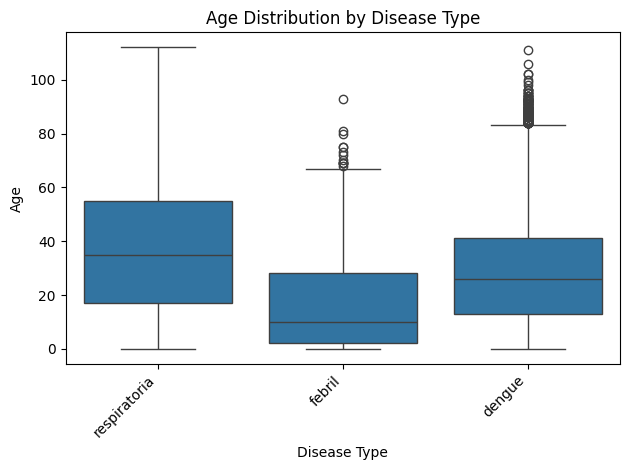

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comparar edad por tipo de enfermedad
sns.boxplot(data=df, x="tipo_enfermedad", y="edad")
plt.title("Age Distribution by Disease Type")

# Set the x-axis label in English
plt.xlabel("Disease Type")

# Set the y-axis label in English
plt.ylabel("Age")

# Rotate x-axis labels for better readability if there are many categories
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()


plt.show()


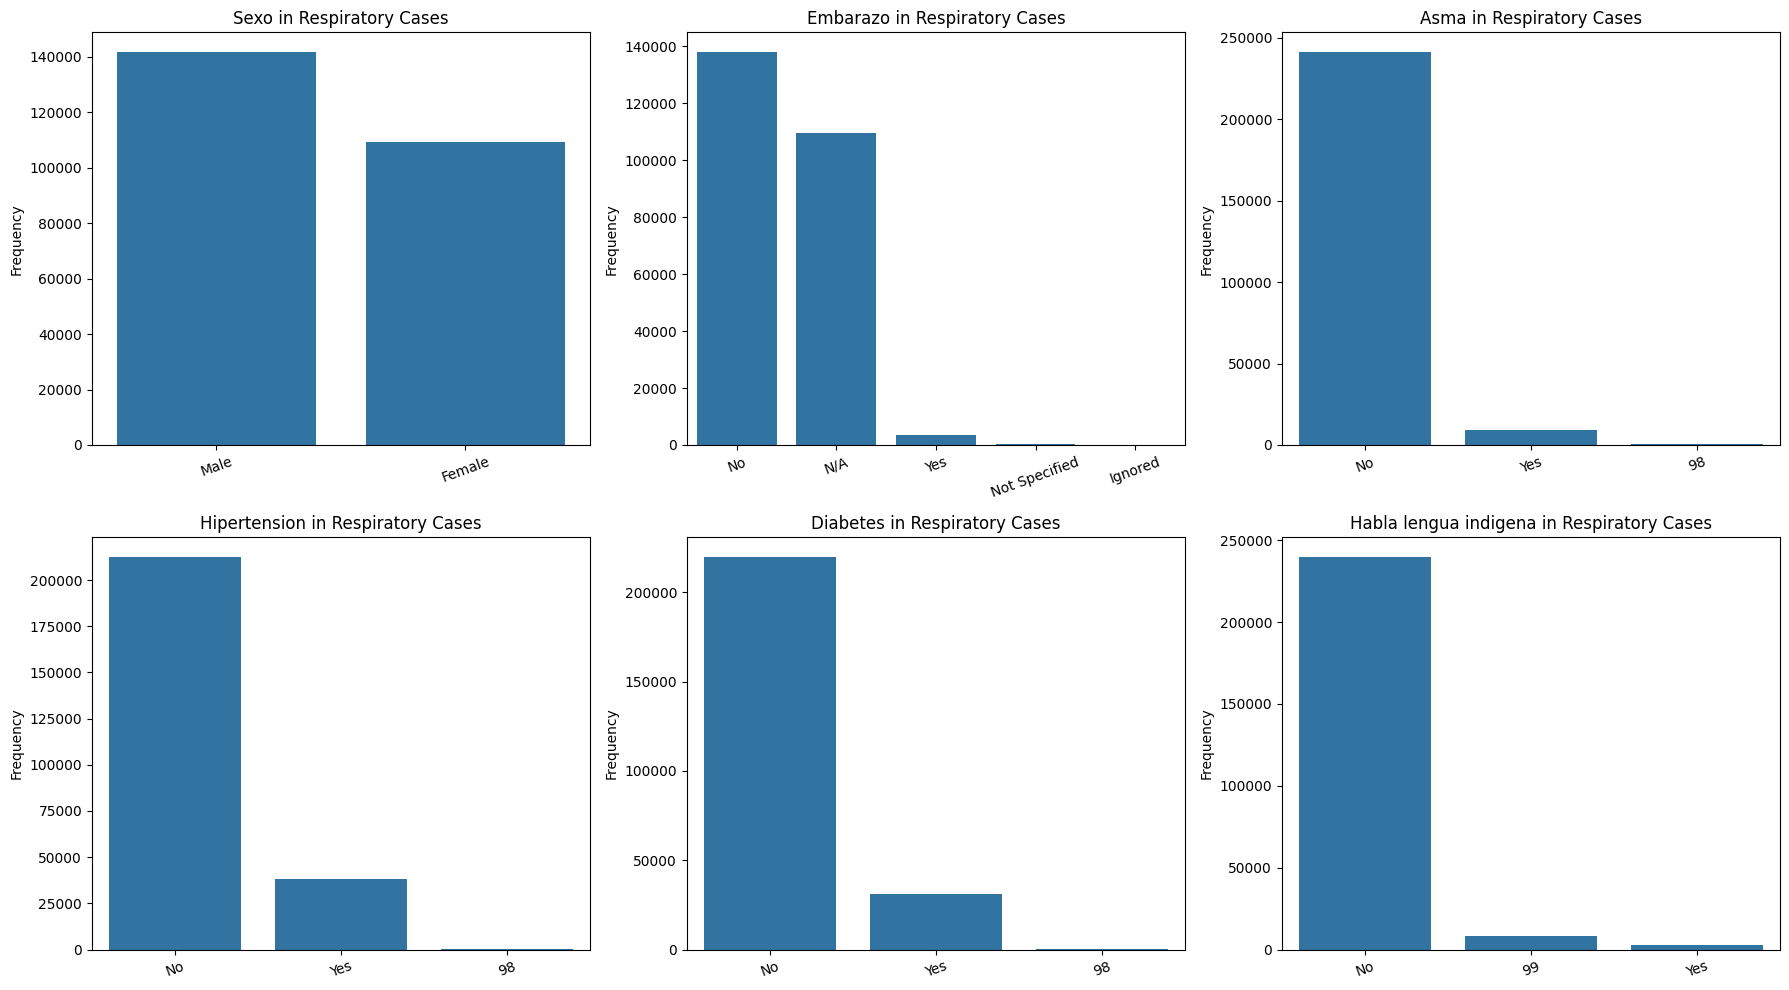

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' (your DataFrame) is already loaded.
# If 'df' is not loaded, you'll need to load your dataset first (e.g., from a CSV file).

# Filter for only respiratory cases
resp_df = df[df['tipo_enfermedad'] == 'respiratoria'].copy()

# Replace codes with readable labels in English
resp_df['sexo'] = resp_df['sexo'].replace({1: 'Male', 2: 'Female'})
resp_df['embarazo'] = resp_df['embarazo'].replace({
    1: 'Yes', 2: 'No', 97: 'N/A', 98: 'Not Specified', 99: 'Ignored'
})
resp_df['asma'] = resp_df['asma'].replace({1: 'Yes', 2: 'No', 97: 'N/A'})
resp_df['hipertension'] = resp_df['hipertension'].replace({1: 'Yes', 2: 'No'})
resp_df['diabetes'] = resp_df['diabetes'].replace({1: 'Yes', 2: 'No'})
resp_df['habla_lengua_indigena'] = resp_df['habla_lengua_indigena'].replace({1: 'Yes', 2: 'No'})

# List of variables to plot
variables = ['sexo', 'embarazo', 'asma', 'hipertension', 'diabetes', 'habla_lengua_indigena']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.countplot(data=resp_df, x=var, ax=axes[i], order=resp_df[var].value_counts().index)
    # Set the title in English
    axes[i].set_title(f'{var.replace("_", " ").capitalize()} in Respiratory Cases')
    # Set the x-axis label (empty for clarity, as variable name is in title)
    axes[i].set_xlabel('')
    # Set the y-axis label in English
    axes[i].set_ylabel('Frequency')
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=20)

plt.tight_layout() # Adjust layout to prevent labels from being cut off



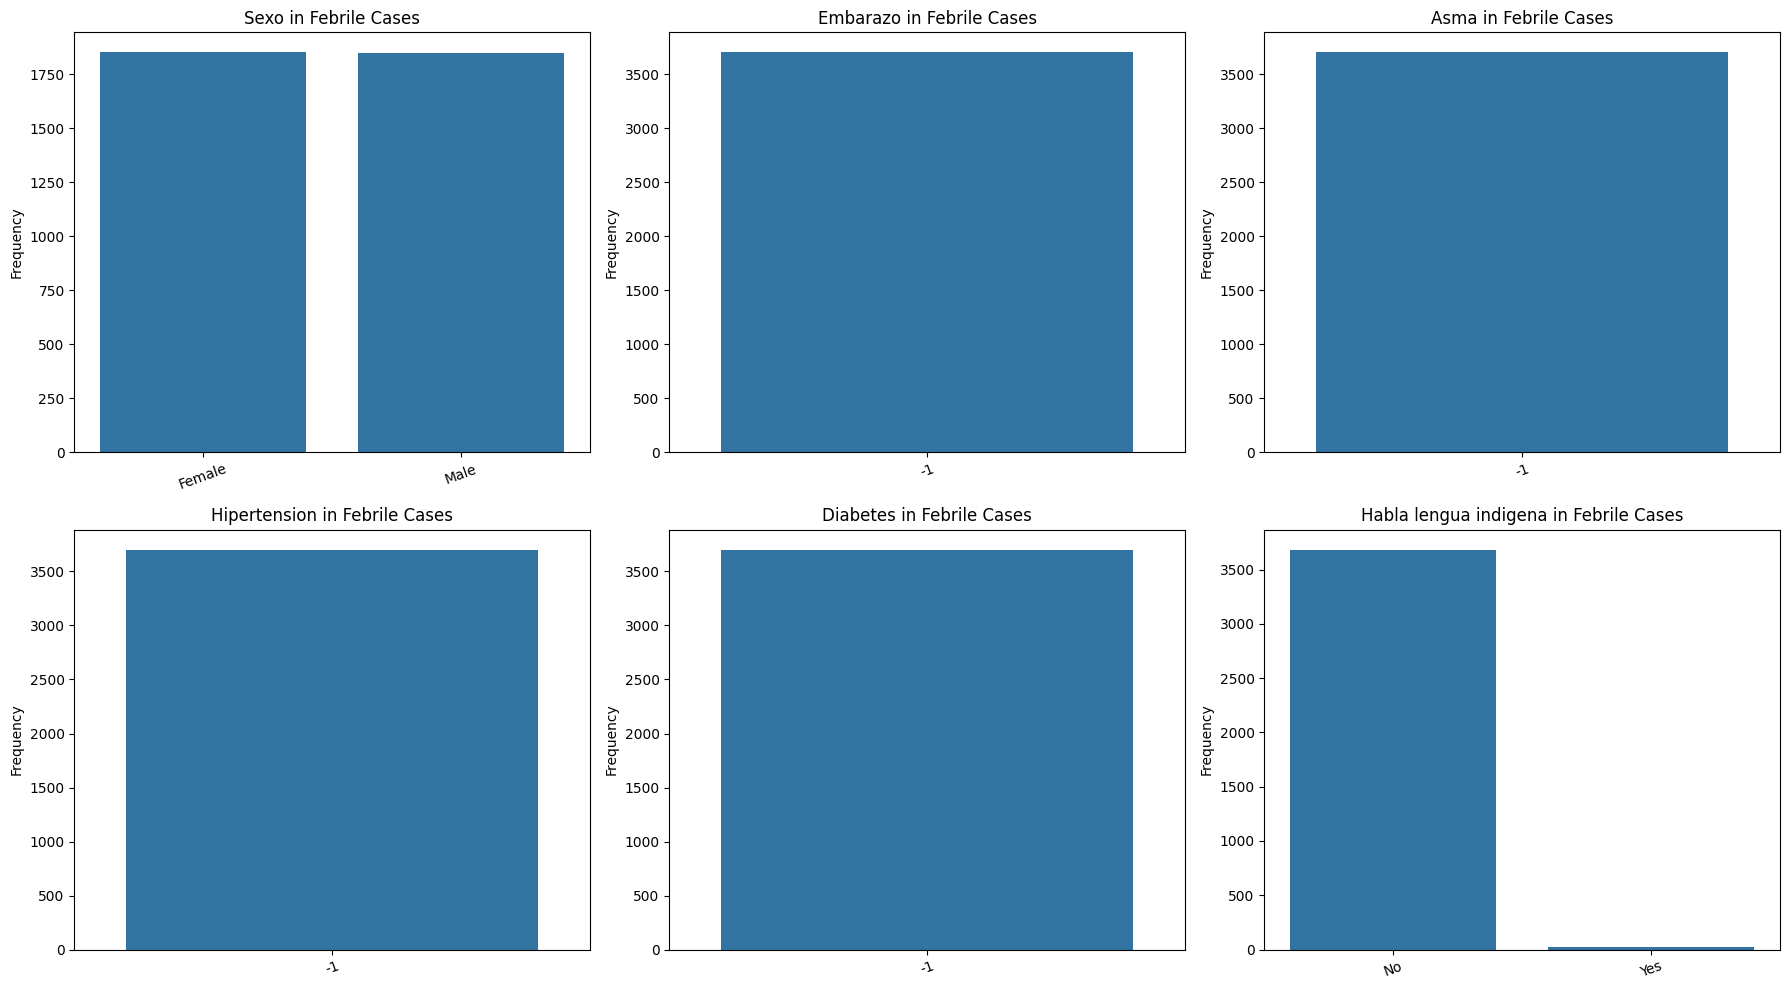

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' (your DataFrame) is already loaded.
# If 'df' is not loaded, you'll need to load your dataset first (e.g., from a CSV file).

# Filter for only febrile cases
resp_df = df[df['tipo_enfermedad'] == 'febril'].copy()

# Replace codes with readable labels in English
resp_df['sexo'] = resp_df['sexo'].replace({1: 'Male', 2: 'Female'})
resp_df['embarazo'] = resp_df['embarazo'].replace({
    1: 'Yes', 2: 'No', 97: 'N/A', 98: 'Not Specified', 99: 'Ignored'
})
resp_df['asma'] = resp_df['asma'].replace({1: 'Yes', 2: 'No', 97: 'N/A'})
resp_df['hipertension'] = resp_df['hipertension'].replace({1: 'Yes', 2: 'No'})
resp_df['diabetes'] = resp_df['diabetes'].replace({1: 'Yes', 2: 'No'})
resp_df['habla_lengua_indigena'] = resp_df['habla_lengua_indigena'].replace({1: 'Yes', 2: 'No'})

# List of variables to plot
variables = ['sexo', 'embarazo', 'asma', 'hipertension', 'diabetes', 'habla_lengua_indigena']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.countplot(data=resp_df, x=var, ax=axes[i], order=resp_df[var].value_counts().index)
    # Set the title in English, specifying 'Febrile Cases'
    axes[i].set_title(f'{var.replace("_", " ").capitalize()} in Febrile Cases')
    # Set the x-axis label (empty for clarity, as variable name is in title)
    axes[i].set_xlabel('')
    # Set the y-axis label in English
    axes[i].set_ylabel('Frequency')
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=20)

plt.tight_layout() # Adjust layout to prevent labels from being cut off



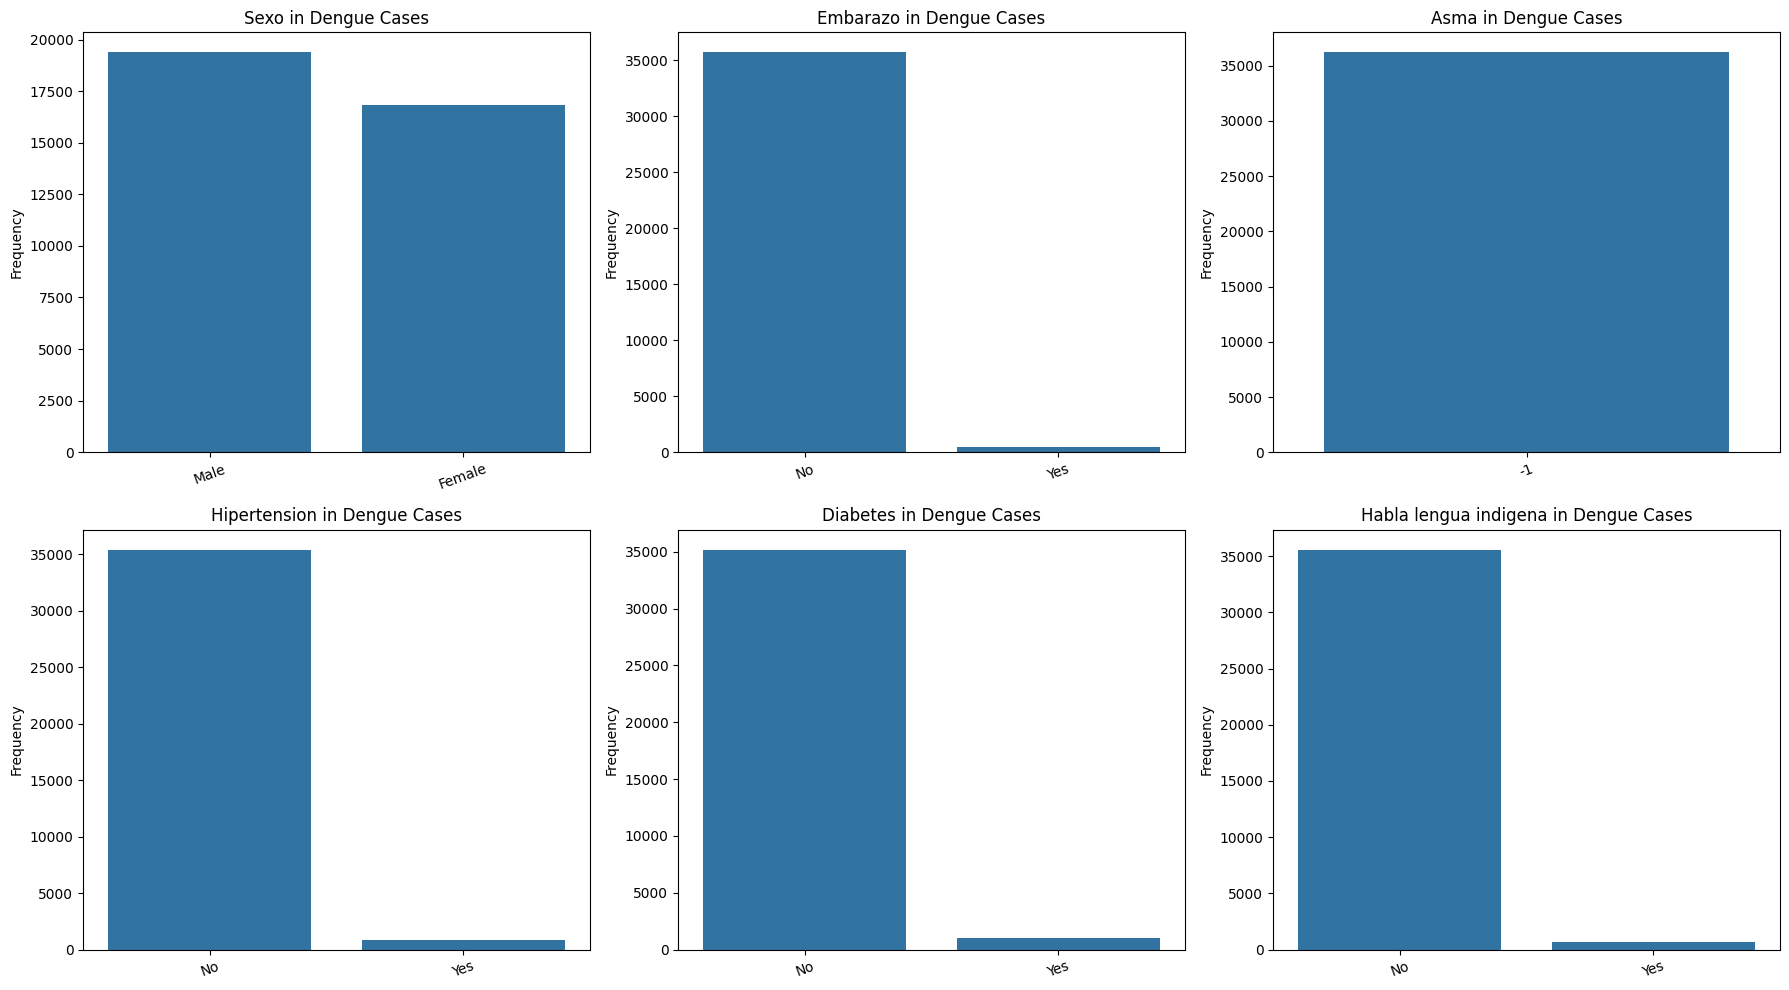

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' (your DataFrame) is already loaded.
# If 'df' is not loaded, you'll need to load your dataset first (e.g., from a CSV file).

# Filter for only dengue cases
resp_df = df[df['tipo_enfermedad'] == 'dengue'].copy()

# Replace codes with readable labels in English
resp_df['sexo'] = resp_df['sexo'].replace({1: 'Male', 2: 'Female'})
resp_df['embarazo'] = resp_df['embarazo'].replace({
    1: 'Yes', 2: 'No', 97: 'N/A', 98: 'Not Specified', 99: 'Ignored'
})
resp_df['asma'] = resp_df['asma'].replace({1: 'Yes', 2: 'No', 97: 'N/A'})
resp_df['hipertension'] = resp_df['hipertension'].replace({1: 'Yes', 2: 'No'})
resp_df['diabetes'] = resp_df['diabetes'].replace({1: 'Yes', 2: 'No'})
resp_df['habla_lengua_indigena'] = resp_df['habla_lengua_indigena'].replace({1: 'Yes', 2: 'No'})

# List of variables to plot
variables = ['sexo', 'embarazo', 'asma', 'hipertension', 'diabetes', 'habla_lengua_indigena']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.countplot(data=resp_df, x=var, ax=axes[i], order=resp_df[var].value_counts().index)
    # Set the title in English, specifying 'Dengue Cases'
    axes[i].set_title(f'{var.replace("_", " ").capitalize()} in Dengue Cases')
    # Set the x-axis label (empty for clarity, as variable name is in title)
    axes[i].set_xlabel('')
    # Set the y-axis label in English
    axes[i].set_ylabel('Frequency')
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=20)

plt.tight_layout() # Adjust layout to prevent labels from being cut off

In [15]:
# Asegúrate de tener mapeo de entidades
mapa_entidades = {
    1: "Aguascalientes", 2: "Baja California", 3: "Baja California Sur", 4: "Campeche",
    5: "Coahuila", 6: "Colima", 7: "Chiapas", 8: "Chihuahua", 9: "CDMX", 10: "Durango",
    11: "Guanajuato", 12: "Guerrero", 13: "Hidalgo", 14: "Jalisco", 15: "México",
    16: "Michoacán", 17: "Morelos", 18: "Nayarit", 19: "Nuevo León", 20: "Oaxaca",
    21: "Puebla", 22: "Querétaro", 23: "Quintana Roo", 24: "San Luis Potosí",
    25: "Sinaloa", 26: "Sonora", 27: "Tabasco", 28: "Tamaulipas", 29: "Tlaxcala",
    30: "Veracruz", 31: "Yucatán", 32: "Zacatecas"
}

# Mapear los nombres a la columna
df['entidad_nombre'] = df['entidad_res'].map(mapa_entidades)

# Agrupar por entidad y tipo de enfermedad
agrupado_por_entidad = df.groupby(['entidad_nombre', 'tipo_enfermedad']).size().reset_index(name='casos')


<ipython-input-20-4028187242>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-20-4028187242>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-20-4028187242>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


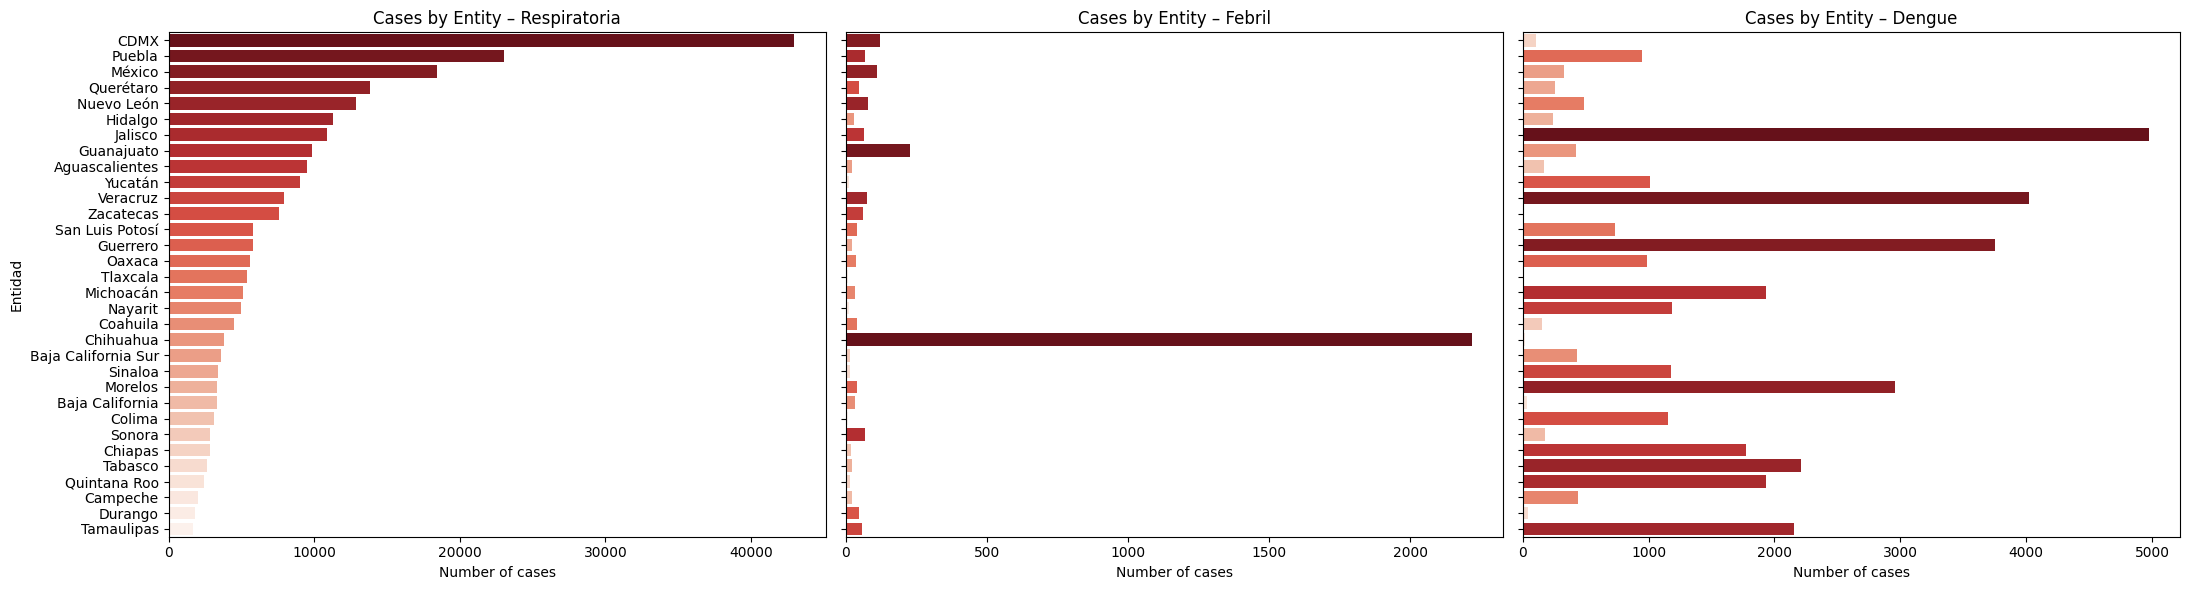

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

tipos = ['respiratoria', 'febril', 'dengue']
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)

for i, tipo in enumerate(tipos):
    datos = agrupado_por_entidad[agrupado_por_entidad['tipo_enfermedad'] == tipo]
    datos_ordenado = datos.sort_values('casos', ascending=False)

    sns.barplot(
        x='casos',
        y='entidad_nombre',
        data=datos_ordenado,
        palette='Reds_r',
        ax=axes[i]
    )
    axes[i].set_title(f'Cases by Entity – {tipo.capitalize()}')
    axes[i].set_xlabel('Number of cases')
    axes[i].set_ylabel('' if i != 0 else 'Entidad')

plt.tight_layout()
plt.show()


In [22]:
import matplotlib.pyplot as plt

def graficar_defunciones_combinadas(df, combinaciones, tipo_enfermedad):
    df_tipo = df[df['tipo_enfermedad'] == tipo_enfermedad]
    resultados = []

    for combo in combinaciones:
        nombre_combo = ' + '.join(combo)
        filtro = (df_tipo[combo[0]] == 1)
        for col in combo[1:]:
            filtro &= (df_tipo[col] == 1)
        subset = df_tipo[filtro]
        total = len(subset)
        defunciones = subset['defuncion_binaria'].sum()
        porcentaje = (defunciones / total * 100) if total > 0 else 0
        resultados.append((nombre_combo, total, defunciones, porcentaje))

    etiquetas = [r[0] for r in resultados]
    valores = [r[3] for r in resultados]
    cantidades = [r[2] for r in resultados]

    plt.figure(figsize=(12, 6))

    if all(v == 0 for v in valores):
        # Mostrar mensaje si todas las combinaciones tienen 0 defunciones
        plt.text(0.5, 0.5,
                 "No deaths were registered for these combinations.",
                 horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes, fontsize=12)
        plt.axis('off')
    else:
        bars = plt.bar(etiquetas, valores, color='tomato')
        plt.ylabel('% of death')
        plt.title(f'% of death per factor combination – {tipo_enfermedad.capitalize()}')
        plt.xticks(rotation=45)

        # Añadir cantidad encima de cada barra
        for bar, cantidad in zip(bars, cantidades):
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2,
                     yval + max(valores) * 0.02,  # margen dinámico
                     f"{cantidad}",
                     ha='center', va='bottom')

        plt.subplots_adjust(top=0.85, bottom=0.25)

    plt.tight_layout()
    plt.show()

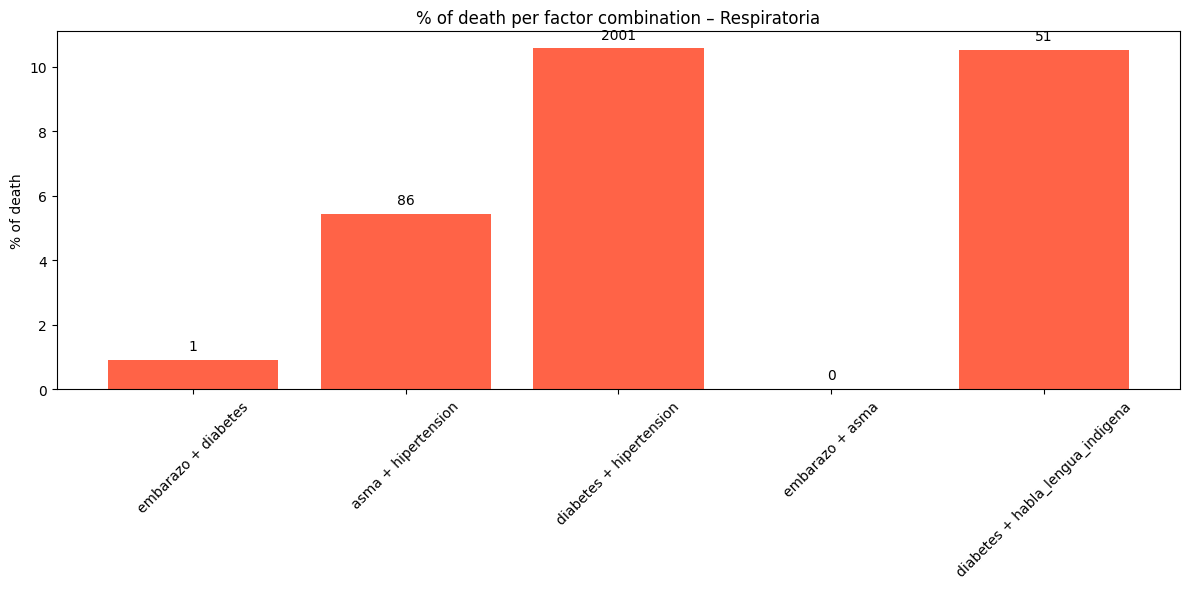

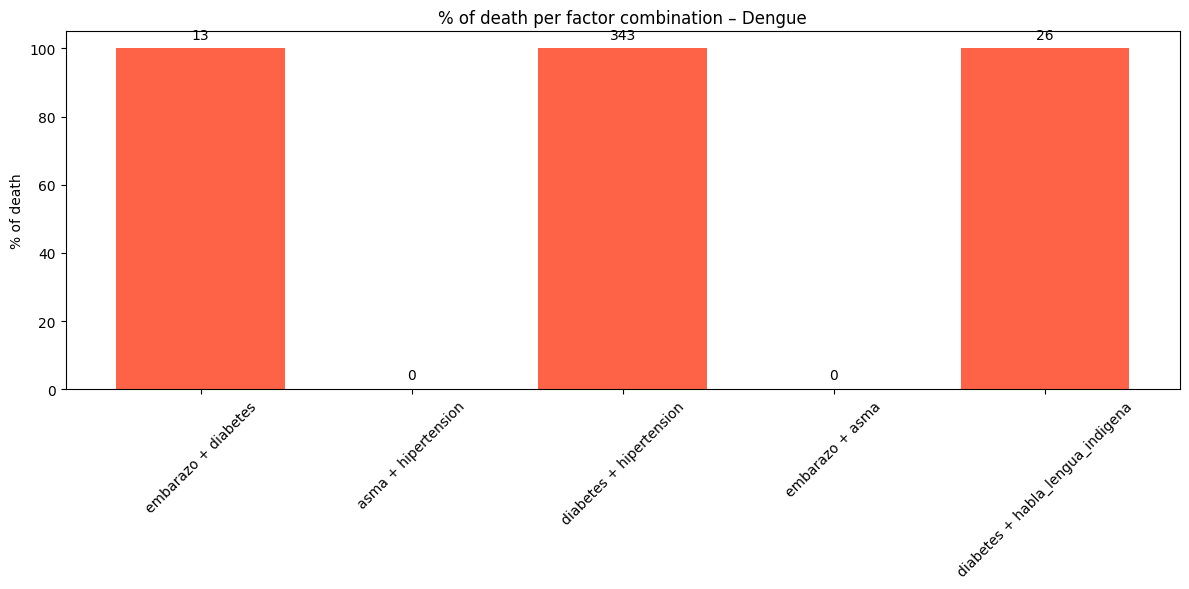

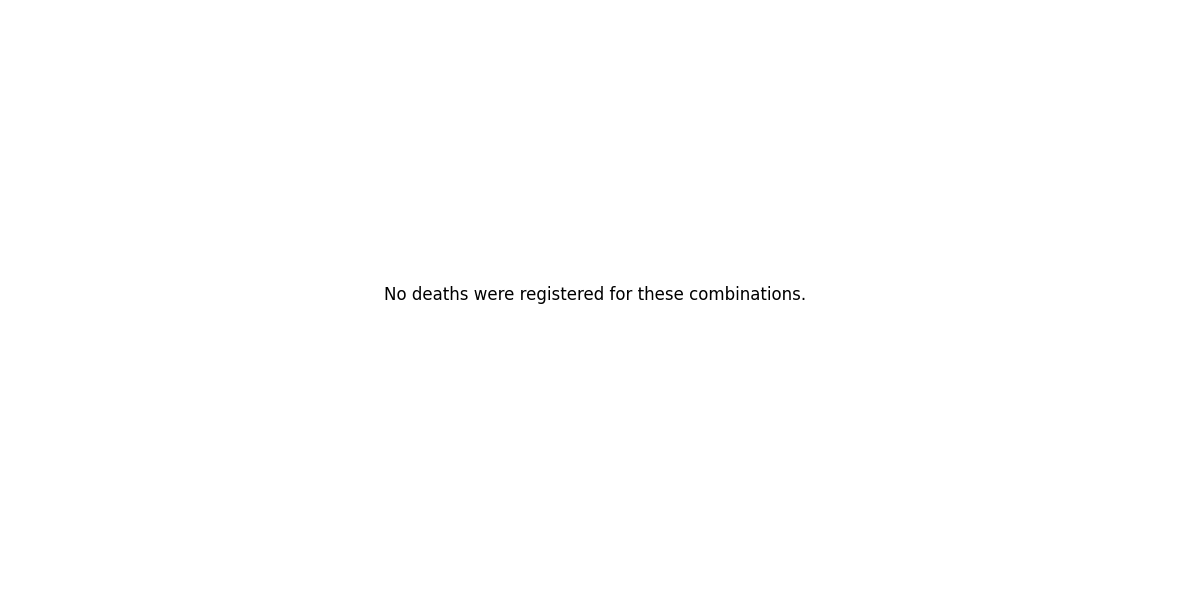

In [23]:
combinaciones = [
    ['embarazo', 'diabetes'],
    ['asma', 'hipertension'],
    ['diabetes', 'hipertension'],
    ['embarazo', 'asma'],
    ['diabetes', 'habla_lengua_indigena']
]

graficar_defunciones_combinadas(df, combinaciones, tipo_enfermedad='respiratoria')
graficar_defunciones_combinadas(df, combinaciones, tipo_enfermedad='dengue')
graficar_defunciones_combinadas(df, combinaciones, tipo_enfermedad='febril')

In [24]:
# 1. Convertir fecha_sintomas a datetime
df['fecha_sintomas'] = pd.to_datetime(df['fecha_sintomas'], errors='coerce')
print(df.head())

  fecha_sintomas  edad  sexo  entidad_res  municipio_res  embarazo  \
0     2024-01-25    31     2            9              3        97   
1     2025-04-20     8     2            1              3        97   
2     2024-01-01    29     1            9              7         2   
3     2024-01-02     1     2           32             56        97   
4     2024-01-02    55     1           19             26         2   

   habla_lengua_indigena  diabetes  asma  hipertension defuncion  diagnostico  \
0                      2         2     2             2       NaT            7   
1                      2         2     2             2       NaT            6   
2                      2         2     2             2       NaT            7   
3                      2         2     2             2       NaT            7   
4                      2         2     2             2       NaT            7   

  tipo_enfermedad  defuncion_binaria  asma_isnull  fecha_sintomas_isnull  \
0    respiratori

In [25]:
codigo_a_estado = {
    1: "Aguascalientes",
    2: "Baja California",
    3: "Baja California Sur",
    4: "Campeche",
    5: "Coahuila",
    6: "Colima",
    7: "Chiapas",
    8: "Chihuahua",
    9: "Ciudad de México",
    10: "Durango",
    11: "Guanajuato",
    12: "Guerrero",
    13: "Hidalgo",
    14: "Jalisco",
    15: "Estado de México",
    16: "Michoacán",
    17: "Morelos",
    18: "Nayarit",
    19: "Nuevo León",
    20: "Oaxaca",
    21: "Puebla",
    22: "Querétaro",
    23: "Quintana Roo",
    24: "San Luis Potosí",
    25: "Sinaloa",
    26: "Sonora",
    27: "Tabasco",
    28: "Tamaulipas",
    29: "Tlaxcala",
    30: "Veracruz",
    31: "Yucatán",
    32: "Zacatecas"
}

# Crear una nueva columna 'entidad_nombre' con los nombres de los estados
df['entidad_nombre'] = df['entidad_res'].map(codigo_a_estado)

In [26]:
df_temp = df.copy()
# Crear columna mes_anio (año-mes)
df_temp['mes_anio'] = df_temp['fecha_sintomas'].dt.to_period('M')

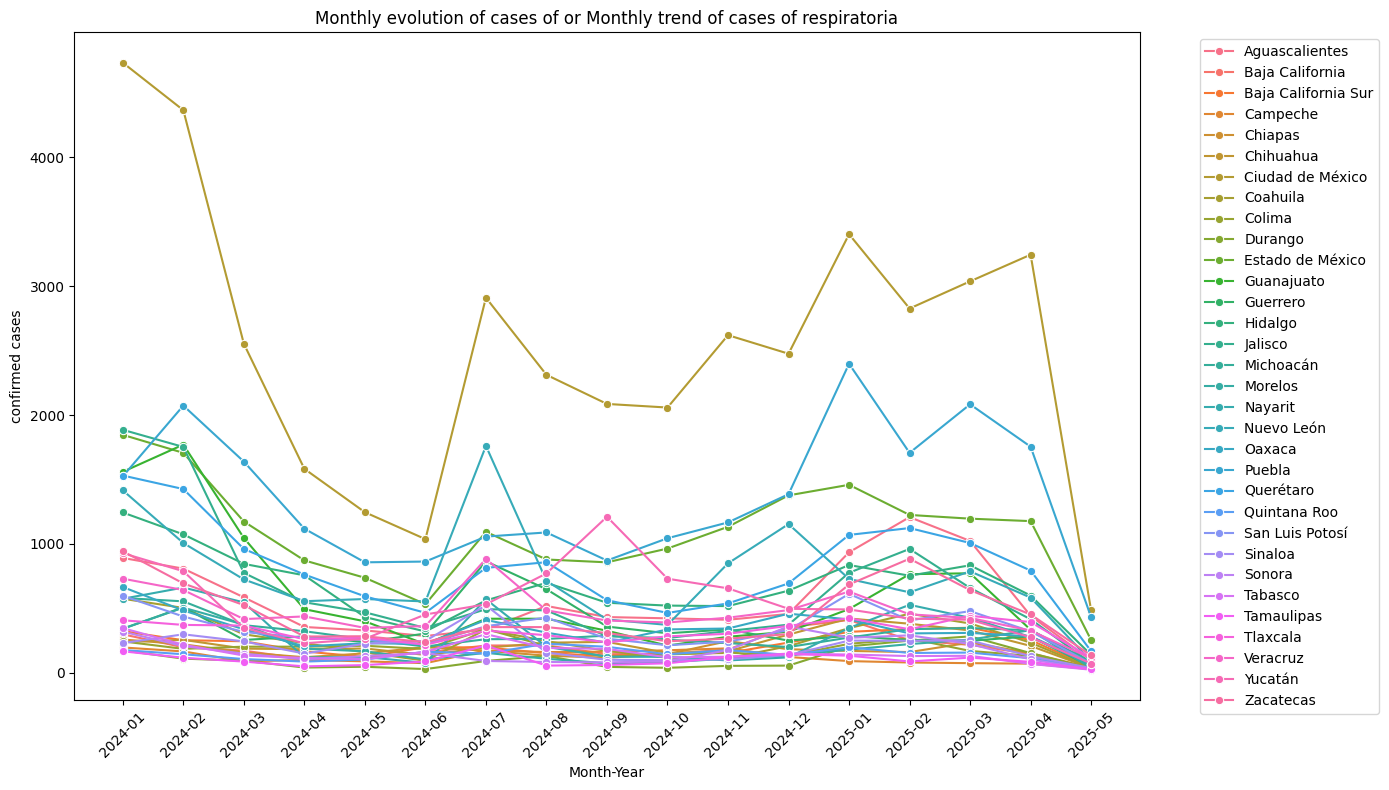

In [31]:
# Crear columna mes-año para agrupación mensual
df['mes_anio'] = df['fecha_sintomas'].dt.to_period('M').astype(str)

# Agrupar por mes, estado (ya con nombre) y tipo de enfermedad
casos_mensuales = df.groupby(['mes_anio', 'entidad_nombre', 'tipo_enfermedad']).size().reset_index(name='casos')

# Filtrar para la enfermedad que quieres analizar
enfermedad_elegida = 'respiratoria'
casos_filtrados = casos_mensuales[casos_mensuales['tipo_enfermedad'] == enfermedad_elegida]

# Graficar evolución mensual por estado
plt.figure(figsize=(14, 8))
sns.lineplot(data=casos_filtrados, x='mes_anio', y='casos', hue='entidad_nombre', marker='o')
plt.xticks(rotation=45)
plt.title(f'Monthly evolution of cases of or Monthly trend of cases of {enfermedad_elegida}')
plt.ylabel('confirmed cases')
plt.xlabel('Month-Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

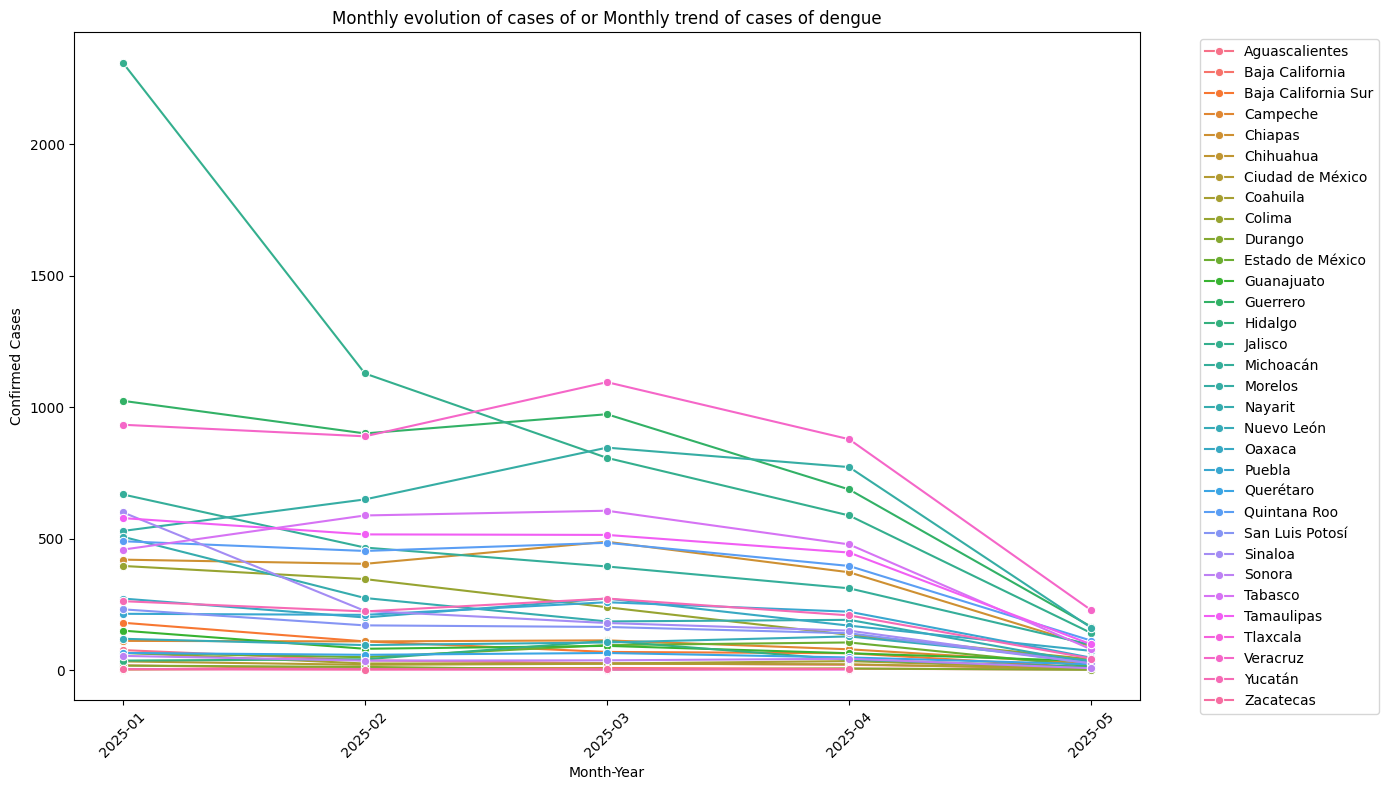

In [32]:
# Crear columna mes-año para agrupación mensual
df['mes_anio'] = df['fecha_sintomas'].dt.to_period('M').astype(str)

# Agrupar por mes, estado (ya con nombre) y tipo de enfermedad
casos_mensuales = df.groupby(['mes_anio', 'entidad_nombre', 'tipo_enfermedad']).size().reset_index(name='casos')

# Filtrar para la enfermedad que quieres analizar
enfermedad_elegida = 'dengue'
casos_filtrados = casos_mensuales[casos_mensuales['tipo_enfermedad'] == enfermedad_elegida]

# Graficar evolución mensual por estado
plt.figure(figsize=(14, 8))
sns.lineplot(data=casos_filtrados, x='mes_anio', y='casos', hue='entidad_nombre', marker='o')
plt.xticks(rotation=45)
plt.title(f'Monthly evolution of cases of or Monthly trend of cases of {enfermedad_elegida}')
plt.ylabel('Confirmed Cases')
plt.xlabel('Month-Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

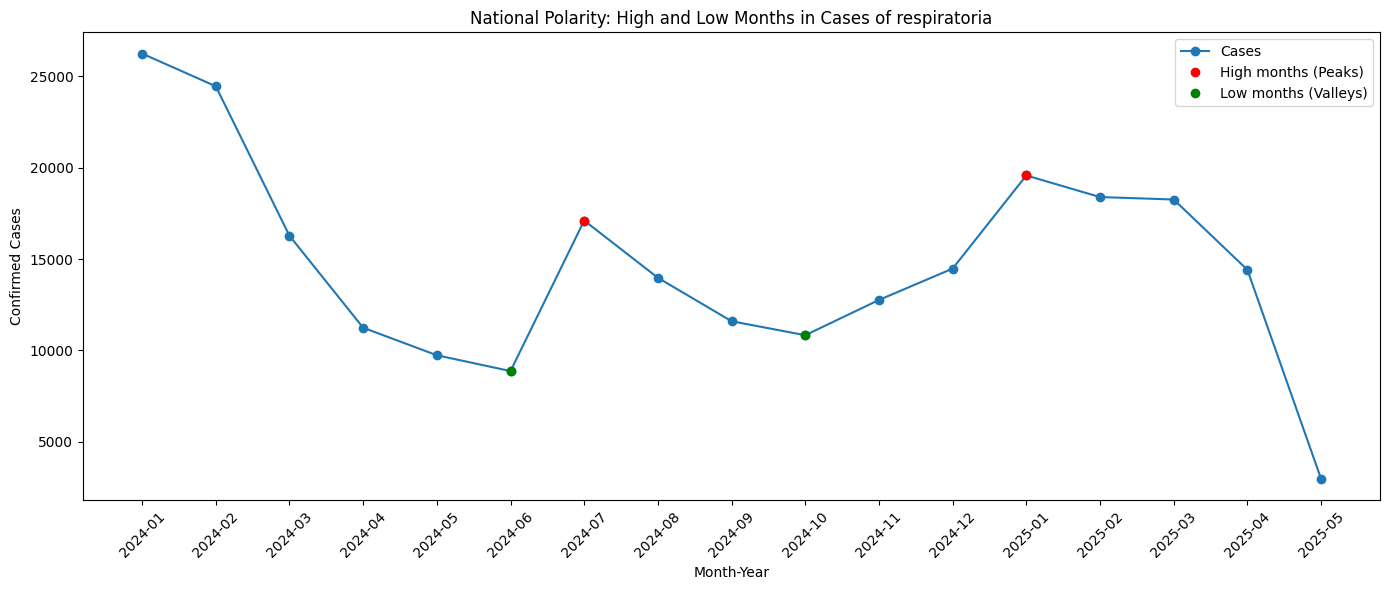

High Months (Peaks):
['2024-07', '2025-01']

Low months (Valleys):
['2024-06', '2024-10']


In [35]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Asegurar que fecha_sintomas es datetime y crear mes_año
df['fecha_sintomas'] = pd.to_datetime(df['fecha_sintomas'], errors='coerce')
df = df.dropna(subset=['fecha_sintomas'])  # eliminar filas sin fecha

df['mes_anio'] = df['fecha_sintomas'].dt.to_period('M').astype(str)

# Filtrar enfermedad deseada
enfermedad_elegida = 'respiratoria'
df_enf = df[df['tipo_enfermedad'] == enfermedad_elegida]

# Agrupar casos por mes a nivel nacional
casos_nacionales = df_enf.groupby('mes_anio').size().reset_index(name='casos')

# Ordenar cronológicamente (importante)
casos_nacionales = casos_nacionales.sort_values('mes_anio')

# Extraer la serie de casos
y = casos_nacionales['casos'].values

# Detectar picos (meses altos)
peaks, _ = find_peaks(y, distance=1, prominence=5)  # 'prominence' filtra picos poco relevantes

# Detectar valles (meses bajos)
valleys, _ = find_peaks(-y, distance=1, prominence=5)

# Graficar
plt.figure(figsize=(14,6))
plt.plot(casos_nacionales['mes_anio'], y, marker='o', label='Cases')
plt.plot(casos_nacionales['mes_anio'].iloc[peaks], y[peaks], "ro", label='High months (Peaks)')
plt.plot(casos_nacionales['mes_anio'].iloc[valleys], y[valleys], "go", label='Low months (Valleys)')
plt.xticks(rotation=45)
plt.title(f'National Polarity: High and Low Months in Cases of {enfermedad_elegida}')
plt.xlabel('Month-Year')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.tight_layout()
plt.show()

# Opcional: imprimir meses detectados
print("High Months (Peaks):")
print(casos_nacionales['mes_anio'].iloc[peaks].tolist())

print("\nLow months (Valleys):")
print(casos_nacionales['mes_anio'].iloc[valleys].tolist())


<ipython-input-34-3399303747>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha_sintomas'] = pd.to_datetime(df['fecha_sintomas'], errors='coerce')


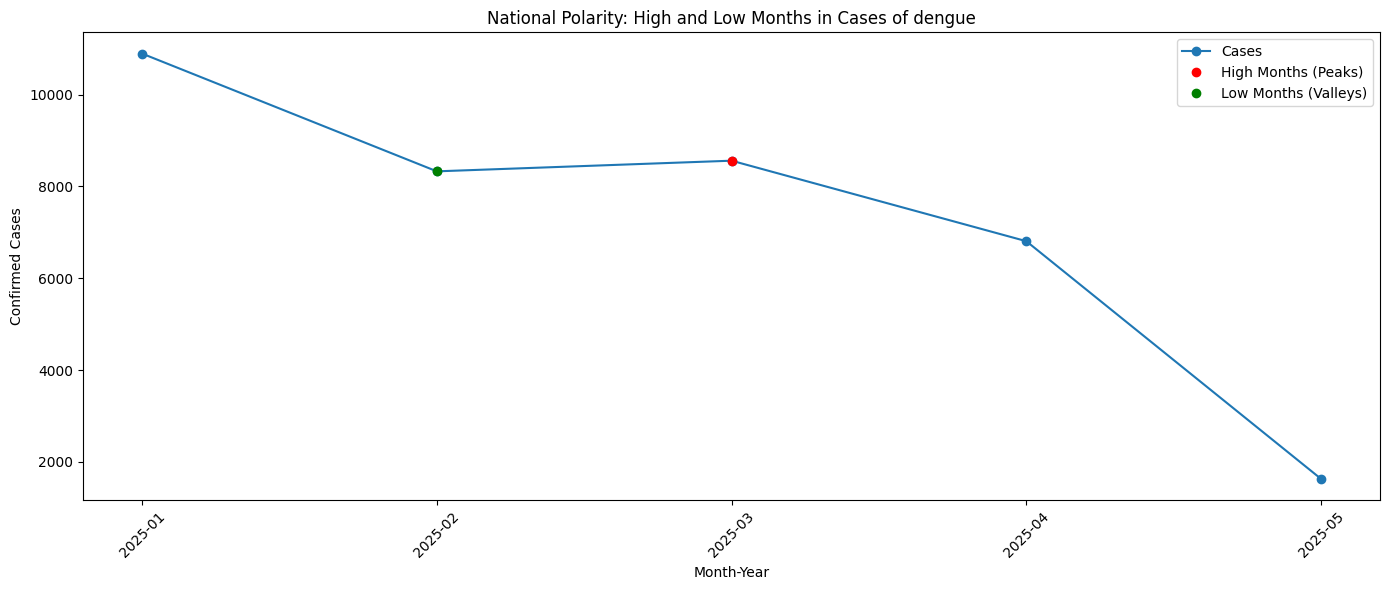

High Months (Peaks):
['2025-03']

Low Months (Valleys):
['2025-02']


In [34]:
# Asegurar que fecha_sintomas es datetime y crear mes_año
df['fecha_sintomas'] = pd.to_datetime(df['fecha_sintomas'], errors='coerce')
df = df.dropna(subset=['fecha_sintomas'])  # eliminar filas sin fecha

df['mes_anio'] = df['fecha_sintomas'].dt.to_period('M').astype(str)

# Filtrar enfermedad deseada
enfermedad_elegida = 'dengue'
df_enf = df[df['tipo_enfermedad'] == enfermedad_elegida]

# Agrupar casos por mes a nivel nacional
casos_nacionales = df_enf.groupby('mes_anio').size().reset_index(name='casos')

# Ordenar cronológicamente (importante)
casos_nacionales = casos_nacionales.sort_values('mes_anio')

# Extraer la serie de casos
y = casos_nacionales['casos'].values

# Detectar picos (meses altos)
peaks, _ = find_peaks(y, distance=1, prominence=5)  # 'prominence' filtra picos poco relevantes

# Detectar valles (meses bajos)
valleys, _ = find_peaks(-y, distance=1, prominence=5)

# Graficar
plt.figure(figsize=(14,6))
plt.plot(casos_nacionales['mes_anio'], y, marker='o', label='Cases')
plt.plot(casos_nacionales['mes_anio'].iloc[peaks], y[peaks], "ro", label='High Months (Peaks)')
plt.plot(casos_nacionales['mes_anio'].iloc[valleys], y[valleys], "go", label='Low Months (Valleys)')
plt.xticks(rotation=45)
plt.title(f'National Polarity: High and Low Months in Cases of {enfermedad_elegida}')
plt.xlabel('Month-Year')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.tight_layout()
plt.show()

# Opcional: imprimir meses detectados
print("High Months (Peaks):")
print(casos_nacionales['mes_anio'].iloc[peaks].tolist())

print("\nLow Months (Valleys):")
print(casos_nacionales['mes_anio'].iloc[valleys].tolist())


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks # Needed for peak detection
import numpy as np # Needed for array operations and nan

# Assuming 'df' (your DataFrame) is already loaded and preprocessed
# with 'tipo_enfermedad', 'mes_anio', 'fecha_sintomas', 'defuncion_binaria',
# 'edad', 'sexo', 'diabetes', 'asma', 'embarazo', and 'entidad_nombre' columns.
# If 'df' is not loaded, you'll need to load your dataset first (e.g., from a CSV file).

# Filter by disease type
disease_type_to_analyze = 'respiratoria'  # Change to the disease type you want to analyze (e.g., 'respiratoria', 'febril', 'dengue')
df_disease = df[df['tipo_enfermedad'] == disease_type_to_analyze].copy()

# Aggregate cases by month nationally
monthly_cases = df_disease.groupby('mes_anio').size().reset_index(name='cases')

# Convert 'mes_anio' to Period objects for correct date calculations later
monthly_cases['mes_anio_period'] = pd.PeriodIndex(monthly_cases['mes_anio'], freq='M')

# Detect peaks and valleys in the monthly case series
prominence_threshold = 5  # Adjust based on data nature (e.g., for significance of peaks/valleys)
peaks_indices, _ = find_peaks(monthly_cases['cases'], prominence=prominence_threshold)
valleys_indices, _ = find_peaks(-monthly_cases['cases'], prominence=prominence_threshold)

# Sort extreme points to define intervals (outbreaks)
extreme_points_indices = np.sort(np.concatenate((peaks_indices, valleys_indices)))

outbreaks = []
for i in range(len(extreme_points_indices) - 1):
    start_idx = extreme_points_indices[i]
    end_idx = extreme_points_indices[i+1]
    # Consider it an outbreak if it starts at a valley and ends at a peak (an upward trend)
    if monthly_cases.loc[start_idx, 'cases'] < monthly_cases.loc[end_idx, 'cases']:
        outbreaks.append((start_idx, end_idx))

results = []

for i, (start, end) in enumerate(outbreaks):
    start_date_str = monthly_cases.loc[start, 'mes_anio']
    end_date_str = monthly_cases.loc[end, 'mes_anio']

    # Convert month_year strings to Period objects to calculate duration
    start_date_period = pd.Period(start_date_str, freq='M')
    end_date_period = pd.Period(end_date_str, freq='M')

    duration_months = (end_date_period - start_date_period).n

    # Filter records of the outbreak by symptom date
    # Ensure 'mes_anio_period' in df_disease is Period for masking
    df_disease['mes_anio_period'] = pd.to_datetime(df_disease['fecha_sintomas'], errors='coerce').dt.to_period('M')
    # Remove rows where date conversion failed
    df_disease_valid_dates = df_disease.dropna(subset=['mes_anio_period'])

    mask = (df_disease_valid_dates['mes_anio_period'] >= start_date_period) & (df_disease_valid_dates['mes_anio_period'] <= end_date_period)
    df_outbreak = df_disease_valid_dates.loc[mask].copy() # Use .copy() to avoid SettingWithCopyWarning

    total_cases = df_outbreak.shape[0]
    # Ensure 'defuncion_binaria' exists and is numerical if used.
    # Assuming 'defuncion_binaria' was created in a previous step and is numerical (0 or 1).
    deaths = df_outbreak['defuncion_binaria'].sum()
    fatality_rate_percent = (deaths / total_cases) * 100 if total_cases > 0 else np.nan

    avg_age = df_outbreak['edad'].mean()
    median_age = df_outbreak['edad'].median()
    most_common_sex = df_outbreak['sexo'].mode()[0] if not df_outbreak['sexo'].mode().empty else np.nan
    pct_diabetes = (df_outbreak['diabetes'] == 1).mean() * 100 if 'diabetes' in df_outbreak.columns else np.nan
    pct_asthma = (df_outbreak['asma'] == 1).mean() * 100 if 'asma' in df_outbreak.columns else np.nan
    pct_pregnancy = (df_outbreak['embarazo'] == 1).mean() * 100 if 'embarazo' in df_outbreak.columns else np.nan

    # Top 3 states with most cases during the outbreak
    top_states = df_outbreak['entidad_nombre'].value_counts().head(3).to_dict()

    results.append({
        'outbreak_id': i + 1,
        'start_date': start_date_str, # Keep as string for consistency if preferred
        'end_date': end_date_str,     # Keep as string for consistency if preferred
        'duration_months': duration_months,
        'total_cases': total_cases,
        'fatality_rate_%': fatality_rate_percent,
        'average_age': avg_age,
        'median_age': median_age,
        'most_common_sex': most_common_sex,
        'pct_diabetes': pct_diabetes,
        'pct_asthma': pct_asthma,
        'pct_pregnancy': pct_pregnancy,
        'top_states': top_states
    })

# Distances between consecutive peaks (in months)
distances_between_peaks = []
# Ensure 'mes_anio_period' in monthly_cases is Period for this calculation as well
# (Already done above when creating monthly_cases['mes_anio_period'])

for i in range(len(peaks_indices) - 1):
    current_peak_date_period = monthly_cases.loc[peaks_indices[i], 'mes_anio_period']
    next_peak_date_period = monthly_cases.loc[peaks_indices[i+1], 'mes_anio_period']
    diff = (next_peak_date_period - current_peak_date_period).n
    distances_between_peaks.append(diff)

# Results in DataFrame
results_df = pd.DataFrame(results)

print(results_df)
print("Distance between peaks (months):", distances_between_peaks)

   outbreak_id start_date end_date  duration_months  total_cases  \
0            1    2024-06  2024-07                1        25983   
1            2    2024-10  2025-01                3        57659   

   fatality_rate_%  average_age  median_age  most_common_sex  pct_diabetes  \
0         4.056498    40.136820        38.0                1     13.493438   
1         3.784318    33.667042        31.0                1     12.225325   

   pct_asthma  pct_pregnancy  \
0    3.456106       1.612593   
1    4.484989       1.312891   

                                          top_states  
0  {'Ciudad de México': 3947, 'Nuevo León': 2312,...  
1  {'Ciudad de México': 10558, 'Puebla': 5992, 'E...  
Distance between peaks (months): [6]


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks # Needed for peak detection
import numpy as np # Needed for array operations and nan

# Assuming 'df' (your DataFrame) is already loaded and preprocessed
# with 'tipo_enfermedad', 'mes_anio', 'fecha_sintomas', 'defuncion_binaria',
# 'edad', 'sexo', 'diabetes', 'asma', 'embarazo', and 'entidad_nombre' columns.
# If 'df' is not loaded, you'll need to load your dataset first (e.g., from a CSV file).

# Filter by disease type
disease_type_to_analyze = 'dengue'  # Set to 'dengue' as requested
df_disease = df[df['tipo_enfermedad'] == disease_type_to_analyze].copy()

# Aggregate cases by month nationally
monthly_cases = df_disease.groupby('mes_anio').size().reset_index(name='cases')

# Convert 'mes_anio' to Period objects for correct date calculations later
monthly_cases['mes_anio_period'] = pd.PeriodIndex(monthly_cases['mes_anio'], freq='M')

# Detect peaks and valleys in the monthly case series
prominence_threshold = 5  # Adjust based on data nature (e.g., for significance of peaks/valleys)
peaks_indices, _ = find_peaks(monthly_cases['cases'], prominence=prominence_threshold)
valleys_indices, _ = find_peaks(-monthly_cases['cases'], prominence=prominence_threshold)

# Sort extreme points to define intervals (outbreaks)
extreme_points_indices = np.sort(np.concatenate((peaks_indices, valleys_indices)))

outbreaks = []
for i in range(len(extreme_points_indices) - 1):
    start_idx = extreme_points_indices[i]
    end_idx = extreme_points_indices[i+1]
    # Consider it an outbreak if it starts at a valley and ends at a peak (an upward trend)
    if monthly_cases.loc[start_idx, 'cases'] < monthly_cases.loc[end_idx, 'cases']:
        outbreaks.append((start_idx, end_idx))

results = []

for i, (start, end) in enumerate(outbreaks):
    start_date_str = monthly_cases.loc[start, 'mes_anio']
    end_date_str = monthly_cases.loc[end, 'mes_anio']

    # Convert month_year strings to Period objects to calculate duration
    start_date_period = pd.Period(start_date_str, freq='M')
    end_date_period = pd.Period(end_date_str, freq='M')

    duration_months = (end_date_period - start_date_period).n

    # Filter records of the outbreak by symptom date
    # Ensure 'mes_anio_period' in df_disease is Period for masking
    df_disease['mes_anio_period'] = pd.to_datetime(df_disease['fecha_sintomas'], errors='coerce').dt.to_period('M')
    # Remove rows where date conversion failed
    df_disease_valid_dates = df_disease.dropna(subset=['mes_anio_period'])

    mask = (df_disease_valid_dates['mes_anio_period'] >= start_date_period) & (df_disease_valid_dates['mes_anio_period'] <= end_date_period)
    df_outbreak = df_disease_valid_dates.loc[mask].copy() # Use .copy() to avoid SettingWithCopyWarning

    total_cases = df_outbreak.shape[0]
    # Ensure 'defuncion_binaria' exists and is numerical if used.
    # Assuming 'defuncion_binaria' was created in a previous step and is numerical (0 or 1).
    deaths = df_outbreak['defuncion_binaria'].sum()
    fatality_rate_percent = (deaths / total_cases) * 100 if total_cases > 0 else np.nan

    avg_age = df_outbreak['edad'].mean()
    median_age = df_outbreak['edad'].median()
    most_common_sex = df_outbreak['sexo'].mode()[0] if not df_outbreak['sexo'].mode().empty else np.nan
    pct_diabetes = (df_outbreak['diabetes'] == 1).mean() * 100 if 'diabetes' in df_outbreak.columns else np.nan
    pct_asthma = (df_outbreak['asma'] == 1).mean() * 100 if 'asma' in df_outbreak.columns else np.nan
    pct_pregnancy = (df_outbreak['embarazo'] == 1).mean() * 100 if 'embarazo' in df_outbreak.columns else np.nan

    # Top 3 states with most cases during the outbreak
    top_states = df_outbreak['entidad_nombre'].value_counts().head(3).to_dict()

    results.append({
        'outbreak_id': i + 1,
        'start_date': start_date_str, # Keep as string for consistency if preferred
        'end_date': end_date_str,     # Keep as string for consistency if preferred
        'duration_months': duration_months,
        'total_cases': total_cases,
        'fatality_rate_%': fatality_rate_percent,
        'average_age': avg_age,
        'median_age': median_age,
        'most_common_sex': most_common_sex,
        'pct_diabetes': pct_diabetes,
        'pct_asthma': pct_asthma,
        'pct_pregnancy': pct_pregnancy,
        'top_states': top_states
    })

# Distances between consecutive peaks (in months)
distances_between_peaks = []
# Ensure 'mes_anio_period' in monthly_cases is Period for this calculation as well
# (Already done above when creating monthly_cases['mes_anio_period'])

for i in range(len(peaks_indices) - 1):
    current_peak_date_period = monthly_cases.loc[peaks_indices[i], 'mes_anio_period']
    next_peak_date_period = monthly_cases.loc[peaks_indices[i+1], 'mes_anio_period']
    diff = (next_peak_date_period - current_peak_date_period).n
    distances_between_peaks.append(diff)

# Results in DataFrame
results_df = pd.DataFrame(results)

print(results_df)
print("Distance between peaks (months):", distances_between_peaks)

   outbreak_id start_date end_date  duration_months  total_cases  \
0            1    2025-02  2025-03                1        16888   

   fatality_rate_%  average_age  median_age  most_common_sex  pct_diabetes  \
0            100.0    27.720334        25.0                1      2.794884   

   pct_asthma  pct_pregnancy  \
0         0.0       1.261251   

                                          top_states  
0  {'Veracruz': 1984, 'Jalisco': 1935, 'Guerrero'...  
Distance between peaks (months): []


In [39]:
# Filtrar solo los casos de Dengue
df_dengue = df[df['tipo_enfermedad'] == 'dengue'].copy()

# Asegurarnos de que 'fecha_sintomas' esté en datetime
df_dengue['fecha_sintomas'] = pd.to_datetime(df_dengue['fecha_sintomas'], errors='coerce')

# Eliminar registros con fecha_sintomas nula
df_dengue = df_dengue.dropna(subset=['fecha_sintomas'])

# Crear una columna 'mes_anio' para agrupar por mes
df_dengue['mes_anio'] = df_dengue['fecha_sintomas'].dt.to_period('M').astype(str)

# Agrupar por mes y contar casos
serie_dengue = df_dengue.groupby('mes_anio').size().reset_index(name='casos')

# Convertir 'mes_anio' a datetime para graficar o modelar
serie_dengue['mes_anio'] = pd.to_datetime(serie_dengue['mes_anio'], format='%Y-%m')

# Revisar el resultado
print(serie_dengue.head())

    mes_anio  casos
0 2025-01-01  10892
1 2025-02-01   8328
2 2025-03-01   8560
3 2025-04-01   6807
4 2025-05-01   1631


In [40]:
# 1️⃣ Crear df_estado_mes con la columna 'entidad' en lugar de 'entidad_nombre'
df_estado_mes = df_dengue.groupby(['mes_anio', 'entidad_res']).agg(
    casos=('tipo_enfermedad', 'count'),
    edad_promedio=('edad', 'mean'),
    edad_mediana=('edad', 'median'),
    sexo_mayoritario=('sexo', lambda x: x.value_counts().idxmax())
).reset_index()

# 2️⃣ Convertir mes_anio a datetime y extraer año/mes si lo quieres como variable aparte
df_estado_mes['mes_anio'] = pd.to_datetime(df_estado_mes['mes_anio'], format='%Y-%m')

# 3️⃣ Proporción de casos por estado
total_casos_mes = df_estado_mes.groupby('mes_anio')['casos'].transform('sum')
df_estado_mes['proporcion_estado'] = df_estado_mes['casos'] / total_casos_mes



#print(df_estado_mes.head())


In [41]:
import numpy as np

# Suponiendo que 'mes_anio' es datetime y tienes columna 'casos'

# Extraer mes y año
df_estado_mes['mes'] = df_estado_mes['mes_anio'].dt.month
df_estado_mes['anio'] = df_estado_mes['mes_anio'].dt.year

# Variables trigonométricas para estacionalidad
df_estado_mes['sin_mes'] = np.sin(2 * np.pi * df_estado_mes['mes'] / 12)
df_estado_mes['cos_mes'] = np.cos(2 * np.pi * df_estado_mes['mes'] / 12)

# Crear lags para casos (por estado)
def crear_lags(df, col, lags, grupo_col):
    for lag in lags:
        df[f'{col}_lag{lag}'] = df.groupby(grupo_col)[col].shift(lag)
    return df

df_estado_mes = crear_lags(df_estado_mes, 'casos', lags=[1,2,3], grupo_col='entidad_res')

# Visualizar primeras filas con lags
print(df_estado_mes.head())


    mes_anio  entidad_res  casos  edad_promedio  edad_mediana  \
0 2025-01-01            1     76      35.802632          35.5   
1 2025-01-01            2     18      23.555556          18.0   
2 2025-01-01            3    180      30.433333          28.0   
3 2025-01-01            4    111      30.252252          27.0   
4 2025-01-01            5     66      27.227273          24.0   

   sexo_mayoritario  proporcion_estado  mes  anio  sin_mes   cos_mes  \
0                 1           0.006978    1  2025      0.5  0.866025   
1                 2           0.001653    1  2025      0.5  0.866025   
2                 1           0.016526    1  2025      0.5  0.866025   
3                 1           0.010191    1  2025      0.5  0.866025   
4                 2           0.006059    1  2025      0.5  0.866025   

   casos_lag1  casos_lag2  casos_lag3  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN   

In [42]:
# Suponiendo que tu DataFrame se llama df_estado_mes y ya tienes las columnas lag creadas

# Elimina filas donde alguna de las columnas lag tenga NaN
df_estado_mes = df_estado_mes.dropna(subset=['casos_lag1', 'casos_lag2', 'casos_lag3'])

# Revisa que se eliminaron las filas con NaN en esas columnas
#print(df_estado_mes[['casos_lag1', 'casos_lag2', 'casos_lag3']].isna().sum())


In [43]:
# prompt: imprime el df

print(df_estado_mes.head())

      mes_anio  entidad_res  casos  edad_promedio  edad_mediana  \
97  2025-04-01            1     20      24.350000          22.0   
98  2025-04-01            2      5      14.800000          14.0   
99  2025-04-01            3     64      29.109375          28.0   
100 2025-04-01            4     79      28.063291          23.0   
101 2025-04-01            5     34      28.529412          27.5   

     sexo_mayoritario  proporcion_estado  mes  anio   sin_mes  cos_mes  \
97                  2           0.002938    4  2025  0.866025     -0.5   
98                  1           0.000735    4  2025  0.866025     -0.5   
99                  1           0.009402    4  2025  0.866025     -0.5   
100                 2           0.011606    4  2025  0.866025     -0.5   
101                 1           0.004995    4  2025  0.866025     -0.5   

     casos_lag1  casos_lag2  casos_lag3  
97         26.0        37.0        76.0  
98          8.0         4.0        18.0  
99         69.0       109.

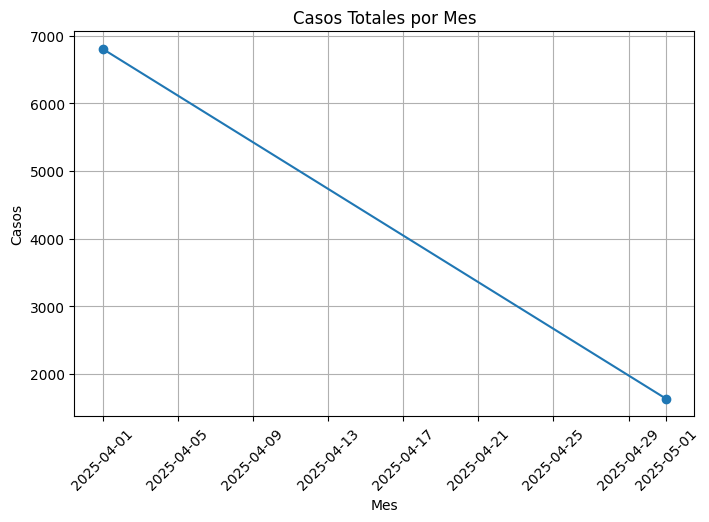

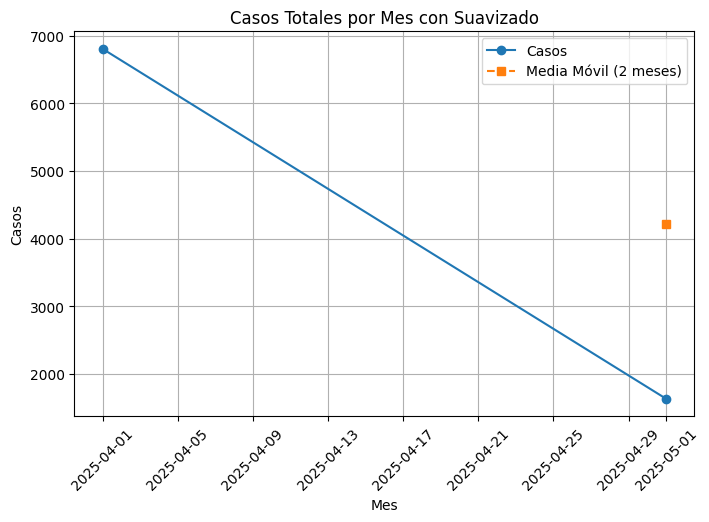

In [44]:
# Agrupamos por mes (mes_año) y sumamos casos
df_mes_total = df_estado_mes.groupby('mes_anio')['casos'].sum().reset_index()

# Graficamos
plt.figure(figsize=(8,5))
plt.plot(df_mes_total['mes_anio'], df_mes_total['casos'], marker='o', linestyle='-')
plt.title('Casos Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Añadimos una media móvil de 2 meses
df_mes_total['casos_media_movil'] = df_mes_total['casos'].rolling(window=2).mean()

plt.figure(figsize=(8,5))
plt.plot(df_mes_total['mes_anio'], df_mes_total['casos'], marker='o', label='Casos')
plt.plot(df_mes_total['mes_anio'], df_mes_total['casos_media_movil'], marker='s', linestyle='--', label='Media Móvil (2 meses)')
plt.title('Casos Totales por Mes con Suavizado')
plt.xlabel('Mes')
plt.ylabel('Casos')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [45]:
# prompt: crea un df con todos los registros donde la enfermedad sea respiratoria y otra linea debe mostar su .shape

resp_df_respiratoria = df[df['tipo_enfermedad'] == 'respiratoria'].copy()
print(resp_df_respiratoria.shape)
print(resp_df_respiratoria.head())


(251245, 19)
  fecha_sintomas  edad  sexo  entidad_res  municipio_res  embarazo  \
0     2024-01-25    31     2            9              3        97   
1     2025-04-20     8     2            1              3        97   
2     2024-01-01    29     1            9              7         2   
3     2024-01-02     1     2           32             56        97   
4     2024-01-02    55     1           19             26         2   

   habla_lengua_indigena  diabetes  asma  hipertension defuncion  diagnostico  \
0                      2         2     2             2       NaT            7   
1                      2         2     2             2       NaT            6   
2                      2         2     2             2       NaT            7   
3                      2         2     2             2       NaT            7   
4                      2         2     2             2       NaT            7   

  tipo_enfermedad  defuncion_binaria  asma_isnull  fecha_sintomas_isnull  \
0  

In [46]:
import pandas as pd

# Convertir fecha a datetime si no está ya
resp_df_respiratoria['fecha_sintomas'] = pd.to_datetime(resp_df_respiratoria['fecha_sintomas'])

# Agregar número de casos por mes
casos_mensuales = resp_df_respiratoria.groupby(resp_df_respiratoria['fecha_sintomas'].dt.to_period('M')).size()
casos_mensuales = casos_mensuales.rename("casos").to_frame().reset_index()
casos_mensuales['fecha'] = casos_mensuales['fecha_sintomas'].dt.to_timestamp()
casos_mensuales = casos_mensuales[['fecha', 'casos']]

print(casos_mensuales.head())

       fecha  casos
0 2024-01-01  26251
1 2024-02-01  24463
2 2024-03-01  16278
3 2024-04-01  11244
4 2024-05-01   9738


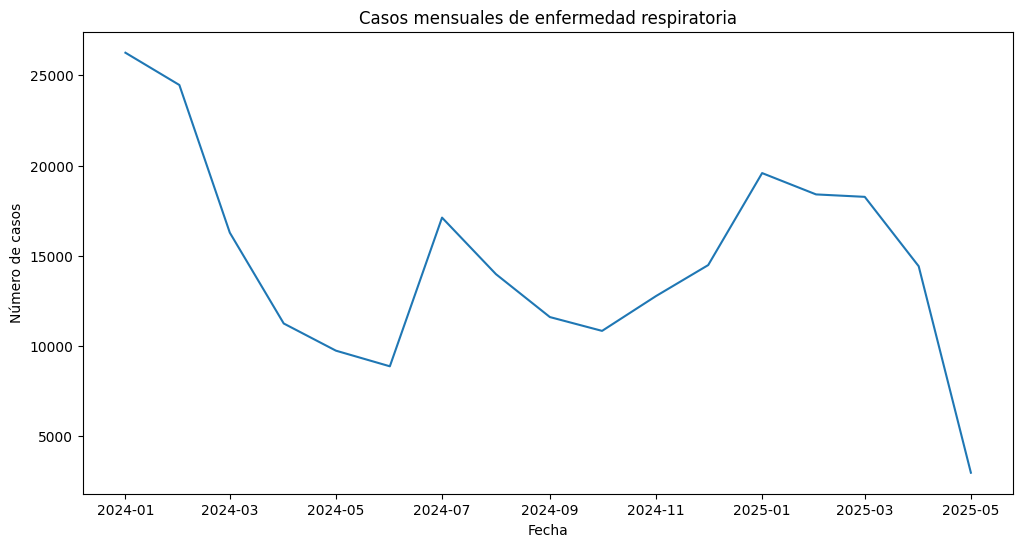

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(casos_mensuales['fecha'], casos_mensuales['casos'])
plt.title('Casos mensuales de enfermedad respiratoria')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.show()


In [ ]:
!pip install numpy==1.24.4 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.4 requires numpy>=1.26, but you have numpy 1.24.4 which i

In [ ]:
#import pandas as pd
#from statsmodels.tsa.arima.model import ARIMA
#import warnings
#warnings.filterwarnings("ignore")

# 1. Preparar datos: agrupar por fecha, sumar casos, re-muestrear por día
#df_arima = resp_df_respiratoria.groupby('fecha_sintomas').size().to_frame(name='casos')
#df_arima.index = pd.to_datetime(df_arima.index)
#df_arima = df_arima.resample('D').sum()  # Cambio a diario

# # 2. Probar varias combinaciones ARIMA (p,d,q) para buscar el mejor modelo según AIC
# results = []
# for p in range(3):
#     for d in range(2):
#         for q in range(3):
#             try:
#                 model = ARIMA(df_arima['casos'], order=(p,d,q))
#                 model_fit = model.fit()
#                 results.append((p,d,q, model_fit.aic))
#             except Exception as e:
#                 continue

# # 3. Mostrar los mejores modelos
# results = sorted(results, key=lambda x: x[3])
# print("Mejores modelos ARIMA según AIC:")
# for res in results[:5]:
#     print(f"ARIMA{res[:3]} - AIC: {res[3]:.2f}")

# # 4. Elegir el mejor modelo (por ejemplo, el primero de la lista) para hacer predicción
# best_order = results[0][:3]
# model = ARIMA(df_arima['casos'], order=best_order)
# model_fit = model.fit()

# # 5. Hacer predicción futura (6 meses por ejemplo)
# pred = model_fit.get_forecast(steps=6)
# pred_ci = pred.conf_int()

# # 6. Mostrar predicción
# print(pred.predicted_mean)

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # 1. Split 80/20
# train_size = int(len(df_arima) * 0.8)
# train, test = df_arima.iloc[:train_size], df_arima.iloc[train_size:]

# print(f"Train size: {len(train)}, Test size: {len(test)}")

# # 2. Ajustar ARIMA sobre train
# model = ARIMA(train['casos'], order=(2,1,2))
# model_fit = model.fit()

# # 3. Predicciones para el test
# forecast = model_fit.forecast(steps=len(test))
# forecast = pd.Series(forecast, index=test.index)

# # 4. Métricas de evaluación
# mae = mean_absolute_error(test['casos'], forecast)
# rmse = np.sqrt(mean_squared_error(test['casos'], forecast))
# print(f"MAE: {mae:.2f}")
# print(f"RMSE: {rmse:.2f}")

# # 5. Graficar
# plt.figure(figsize=(10,6))
# plt.plot(train.index, train['casos'], label='Train')
# plt.plot(test.index, test['casos'], label='Test')
# plt.plot(forecast.index, forecast, label='Predicción ARIMA', linestyle='--')
# plt.legend()
# plt.title('ARIMA(2,1,2) - Validación 80/20')
# plt.show()

In [48]:
!pip install numpy scikit-learn tensorflow

Iniciando 10 ejecuciones para evaluación robusta...

--- Ejecución 1/10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 27.80, RMSE: 36.07

--- Ejecución 2/10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 24.21, RMSE: 31.66

--- Ejecución 3/10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 30.93, RMSE: 40.31

--- Ejecución 4/10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 29.40, RMSE: 37.90

--- Ejecución 5/10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 26.95, RMSE: 35.82

--- Ejecución 6/10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 26.00, RMSE: 34.48

--- Ejecución 7/10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 27.48, RMSE: 35.97

--- Ejecución 8/10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 29.75, RMSE: 38.51

--- Ejecución 9/10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 26.76, RMSE: 35.27

--- Ejecución 10/10 ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 27.79, RMSE: 36.56

--- Resultados Promedio de Múltiples Ejecuciones ---
MAE Promedio: 27.71 (Desviación Estándar: 1.85)
RMSE Promedio: 36.25 (Desviación Estándar: 2.23)


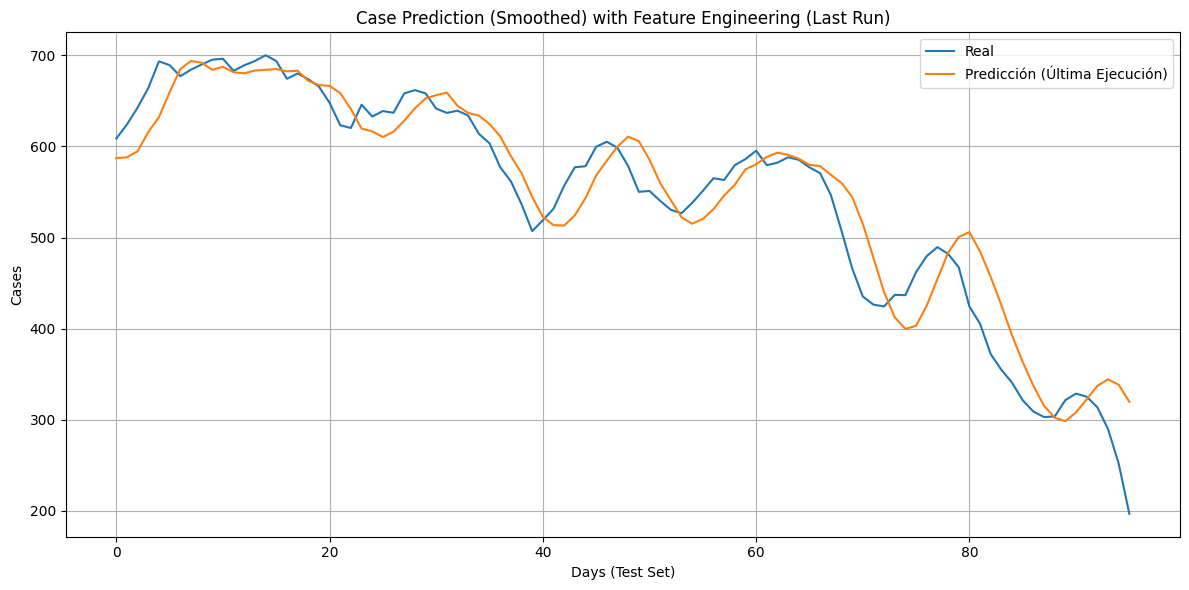

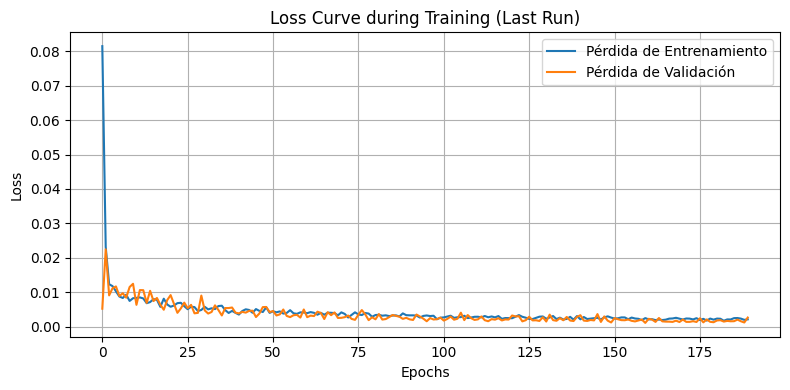

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import os
import tensorflow as tf

# CONFIGURACIÓN DE SEMILLAS PARA REPRODUCIBILIDAD
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
# Habilitar determinismo para operaciones de GPU (si aplica), puede afectar ligeramente el rendimiento
tf.config.experimental.enable_op_determinism()

# 1. Agrupar por fecha, sumar casos, re-muestrear por día
df_arima = resp_df_respiratoria.groupby('fecha_sintomas').size().to_frame(name='casos')
df_arima.index = pd.to_datetime(df_arima.index)
df_arima = df_arima.resample('D').sum() # Asegura una serie diaria continua

# 1. Feature Engineering (Ingeniería de Características)
# Característica: Día de la semana (0=lunes, 6=domingo)
# Usamos one-hot encoding para evitar que el modelo interprete el día de la semana como un valor ordinal.
df_arima['day_of_week'] = df_arima.index.dayofweek
df_arima = pd.get_dummies(df_arima, columns=['day_of_week'], prefix='day')

# Suavizado con media móvil de la variable objetivo 'casos'
df_arima['casos_suavizados'] = df_arima['casos'].rolling(window=7).mean()
df_arima = df_arima.dropna(subset=['casos_suavizados'])

# Definir las características que se usarán en el modelo (incluyendo casos_suavizados)
numerical_features = ['casos_suavizados']
# Ahora 'categorical_features' solo incluirá las columnas 'day_X'
categorical_features = [col for col in df_arima.columns if col.startswith('day_')]
all_features_cols = numerical_features + categorical_features

# 2. Normalización (numéricas escaladas, categóricas como están)
scaler_numerical = MinMaxScaler()
data_numerical_scaled = scaler_numerical.fit_transform(df_arima[numerical_features].values)
data_categorical = df_arima[categorical_features].values
data_scaled = np.concatenate((data_numerical_scaled, data_categorical), axis=1)

# 3. Crear ventanas temporales (Adaptada para múltiples características)
def create_sequences(data, window_size, target_column_index=0):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i, target_column_index])
    return np.array(X), np.array(y)

window_size = 14 # Tamaño de la ventana: 14 días
X, y = create_sequences(data_scaled, window_size, target_column_index=0)
num_features = data_scaled.shape[1]

# 4. Train/test split 80/20
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# --- Bucle para Evaluación Robusta ---
num_runs = 10 # Número de veces que se ejecutará el modelo
all_maes = []
all_rmses = []

print(f"Iniciando {num_runs} ejecuciones para evaluación robusta...")

for i in range(num_runs):
    print(f"\n--- Ejecución {i+1}/{num_runs} ---")

    # Se inicializa el modelo DENTRO del bucle para asegurar una nueva inicialización de pesos
    # en cada corrida, lo cual es parte de lo que queremos promediar.
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(window_size, num_features)),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Reintroducimos EarlyStopping con una paciencia mayor
    early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True) # Aumentar paciencia

    history = model.fit(
        X_train, y_train,
        epochs=200, # Aumentar épocas máximas para permitir que EarlyStopping trabaje
        batch_size=32,
        validation_split=0.1,
        callbacks=[early_stop],
        verbose=0 # Poner en 0 para no saturar la salida durante las múltiples ejecuciones
    )

    pred = model.predict(X_test, verbose=0) # Poner en 0 para no saturar la salida

    temp_pred_scaled = np.zeros((len(pred), num_features))
    temp_pred_scaled[:, 0] = pred.flatten()
    pred_inv = scaler_numerical.inverse_transform(temp_pred_scaled[:, :len(numerical_features)])[:, 0]

    temp_y_test_scaled = np.zeros((len(y_test), num_features))
    temp_y_test_scaled[:, 0] = y_test.flatten()
    y_test_inv = scaler_numerical.inverse_transform(temp_y_test_scaled[:, :len(numerical_features)])[:, 0]

    current_mae = mean_absolute_error(y_test_inv, pred_inv)
    current_rmse = np.sqrt(mean_squared_error(y_test_inv, pred_inv))

    all_maes.append(current_mae)
    all_rmses.append(current_rmse)

    print(f"MAE: {current_mae:.2f}, RMSE: {current_rmse:.2f}")

# Resultados Promedio Finales
avg_mae = np.mean(all_maes)
std_mae = np.std(all_maes)
avg_rmse = np.mean(all_rmses)
std_rmse = np.std(all_rmses)

print("\n--- Resultados Promedio de Múltiples Ejecuciones ---")
print(f"MAE Promedio: {avg_mae:.2f} (Desviación Estándar: {std_mae:.2f})")
print(f"RMSE Promedio: {avg_rmse:.2f} (Desviación Estándar: {std_rmse:.2f})")

# Opcional: Graficar solo la última predicción de la última ejecución para visualizar
# Si quieres visualizar cada predicción, tendrías que guardar los 'pred_inv' de cada bucle.
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Real') # y_test_inv de la última ejecución
plt.plot(pred_inv, label='Predicción (Última Ejecución)') # pred_inv de la última ejecución
plt.title('Case Prediction (Smoothed) with Feature Engineering (Last Run)')
plt.xlabel('Days (Test Set)')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Opcional: Curva de pérdida de la última ejecución
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Loss Curve during Training (Last Run)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()



Iniciando predicción para los próximos 90 días...


<ipython-input-54-827125127>:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_features_scaled[0, 0] = predicted_casos_scaled


Predicción futura completada.


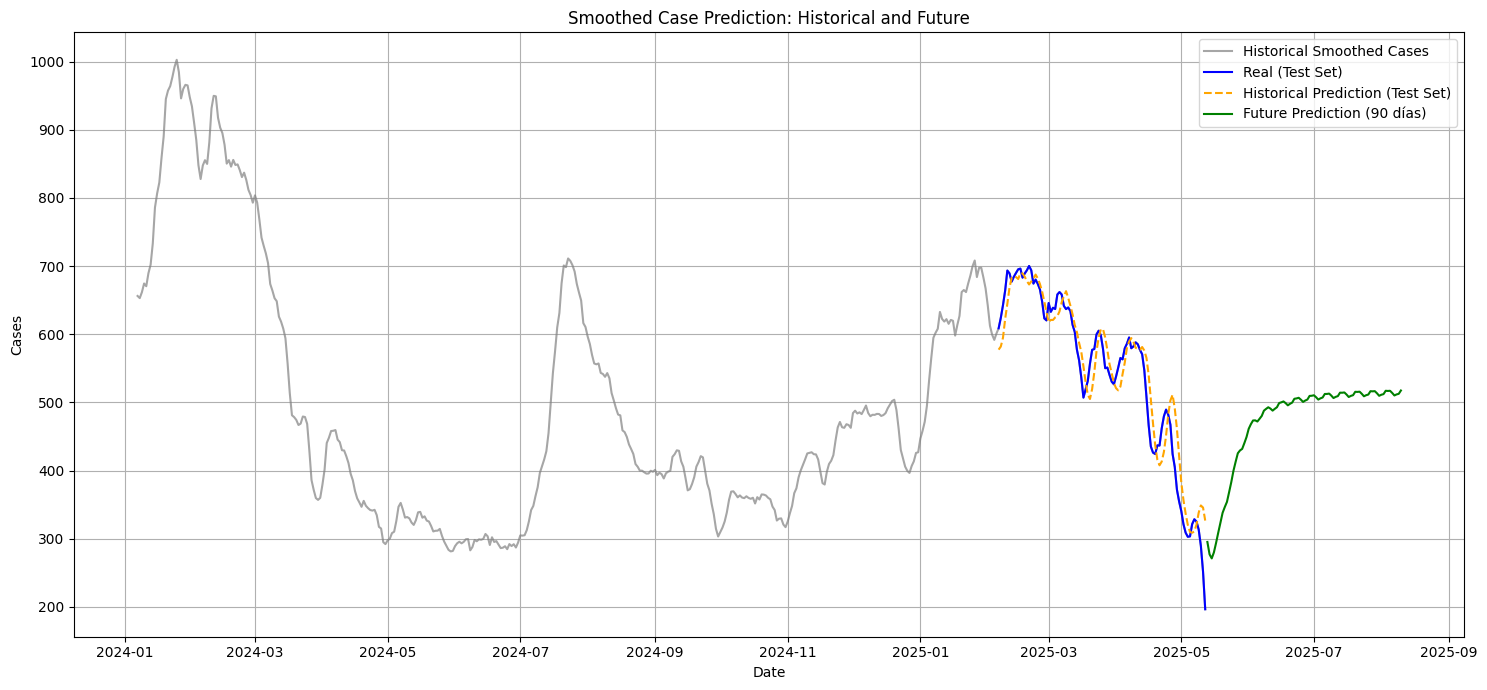


Future Descaled Predictions:
2025-08-06    513.891301
2025-08-07    510.177417
2025-08-08    511.715245
2025-08-09    512.571197
2025-08-10    517.463584
dtype: float64


In [54]:
#Importar datetime para manejar fechas
from datetime import timedelta

# --- Configuración de la Predicción Futura ---
# Número de días en el futuro a predecir (ej. 3 meses * 30 días/mes = 90 días)
num_prediction_days = 90

# --- Preparación para la Predicción ---
# Obtener la última secuencia de datos escalados del conjunto de entrenamiento/prueba
# Esta será la base para iniciar la predicción.
# Usaremos la última 'window_size' de 'data_scaled' (que contiene todas las características).
current_input_sequence = data_scaled[-window_size:]

# Lista para almacenar las predicciones futuras (escaladas)
future_predictions_scaled = []

# Obtener la última fecha en tu DataFrame original (df_arima)
last_date = df_arima.index[-1]

# Lista para almacenar las fechas futuras correspondientes a las predicciones
future_dates = []

# --- Bucle de Predicción Paso a Paso ---
print(f"\nIniciando predicción para los próximos {num_prediction_days} días...")

for i in range(num_prediction_days):
    # 1. Realizar la predicción para el siguiente paso
    # El modelo espera una entrada de forma (1, window_size, num_features)
    predicted_casos_scaled = model.predict(current_input_sequence.reshape(1, window_size, num_features), verbose=0)

    # 2. Obtener la próxima fecha y sus características futuras
    next_date = last_date + timedelta(days=i + 1)
    future_dates.append(next_date)

    # Generar características para la próxima fecha: día de la semana (one-hot encoded)
    next_day_of_week = next_date.dayofweek

    # Crear un array temporal para las nuevas características futuras
    # Suponemos que el orden de las características es:
    # 0: casos_suavizados (que es lo que predijimos)
    # 1 a 7: day_0 a day_6 (one-hot encoded para el día de la semana)
    # (Si hubieras incluido 'is_holiday', también necesitarías generarlo aquí para la fecha futura)

    # Crear un array de ceros con la forma de todas las características (1 fila, num_features columnas)
    next_features_scaled = np.zeros((1, num_features))

    # Asignar el valor predicho de casos_suavizados a la primera columna (índice 0)
    next_features_scaled[0, 0] = predicted_casos_scaled

    # Asignar 1 a la columna one-hot correspondiente al día de la semana.
    # Las columnas one-hot 'day_0' a 'day_6' empiezan desde el índice 1 en 'next_features_scaled'
    # (porque el índice 0 es 'casos_suavizados').
    if next_day_of_week < 7: # Asegurarse de que el día de la semana sea válido (0-6)
        next_features_scaled[0, next_day_of_week + 1] = 1 # +1 porque 'day_0' está en el índice 1

    # 3. Añadir la predicción a la lista y actualizar la secuencia de entrada para la próxima iteración
    future_predictions_scaled.append(predicted_casos_scaled[0, 0])

    # Desplazar la secuencia actual un paso hacia adelante y añadir el nuevo vector de características
    current_input_sequence = np.roll(current_input_sequence, -1, axis=0)
    current_input_sequence[-1] = next_features_scaled[0]

# --- Desescalar las Predicciones Futuras ---
# Creamos un array temporal para desescalar solo la columna de casos_suavizados predichos
# La forma debe coincidir con la forma del scaler_numerical original.
# Creamos una matriz de ceros con el número de predicciones futuras y el número de características numéricas
temp_future_scaled = np.zeros((len(future_predictions_scaled), len(numerical_features)))
temp_future_scaled[:, 0] = np.array(future_predictions_scaled).flatten()

# Desescalar solo la columna de casos_suavizados
future_predictions_inv = scaler_numerical.inverse_transform(temp_future_scaled)[:, 0]

print("Predicción futura completada.")

# --- Combinar datos históricos y predicciones futuras para graficar ---
# Obtener los índices de fecha reales para el conjunto de prueba
test_dates = df_arima.index[split + window_size:] # Ajustar el índice para que coincida con X_test/y_test

# Crear Series de Pandas para facilitar el trazado con fechas
real_series = pd.Series(y_test_inv, index=test_dates)
predicted_series = pd.Series(pred_inv, index=test_dates)
future_predicted_series = pd.Series(future_predictions_inv, index=future_dates)

# --- Gráfico de Resultados Completos ---
plt.figure(figsize=(15, 7))
plt.plot(df_arima.index, df_arima['casos_suavizados'], label='Historical Smoothed Cases', color='gray', alpha=0.7)
plt.plot(real_series.index, real_series, label='Real (Test Set)', color='blue')
plt.plot(predicted_series.index, predicted_series, label='Historical Prediction (Test Set)', color='orange', linestyle='--')
plt.plot(future_predicted_series.index, future_predicted_series, label=f'Future Prediction ({num_prediction_days} días)', color='green', linestyle='-')

plt.title('Smoothed Case Prediction: Historical and Future')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nFuture Descaled Predictions:")
print(future_predicted_series.tail()) # Mostrar las últimas predicciones para verificación


<ipython-input-55-449051975>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cluster = df_cluster.groupby('fecha_sintomas').sum().resample('M').sum().reset_index()


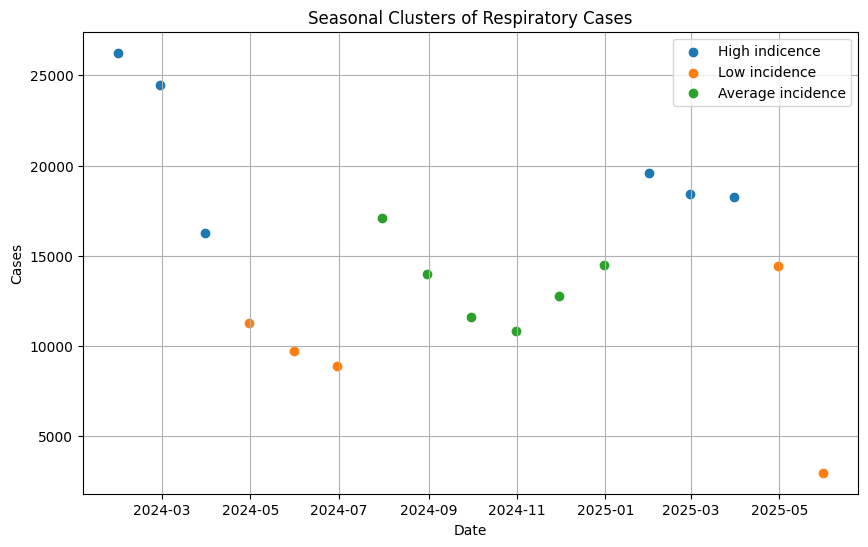

,fecha_sintomas,casos,mes,estacionalidad
0,2024-01-31,26251,1,High indicence
1,2024-02-29,24463,2,High indicence
2,2024-03-31,16278,3,High indicence
3,2024-04-30,11244,4,Low incidence
4,2024-05-31,9738,5,Low incidence


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Agrupar por mes y contar casos
df_cluster = resp_df_respiratoria[['fecha_sintomas']].copy()
df_cluster['fecha_sintomas'] = pd.to_datetime(df_cluster['fecha_sintomas'])
df_cluster['casos'] = 1
df_cluster = df_cluster.groupby('fecha_sintomas').sum().resample('M').sum().reset_index()

# Extraer características estacionales
df_cluster['mes'] = df_cluster['fecha_sintomas'].dt.month
df_cluster['año'] = df_cluster['fecha_sintomas'].dt.year

# Usamos 'mes' y 'casos' como features
X = df_cluster[['mes', 'casos']]

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

# Asignar nombres interpretativos a los clusters
cluster_map = {
    0: 'Average incidence',
    1: 'High indicence',
    2: 'Low incidence'
}
df_cluster['estacionalidad'] = df_cluster['cluster'].map(cluster_map)

# Visualizar clusters con etiquetas interpretadas
plt.figure(figsize=(10, 6))
for label in df_cluster['estacionalidad'].unique():
    cluster_data = df_cluster[df_cluster['estacionalidad'] == label]
    plt.scatter(cluster_data['fecha_sintomas'], cluster_data['casos'], label=label)

plt.title('Seasonal Clusters of Respiratory Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar tabla resumen
df_cluster[['fecha_sintomas', 'casos', 'mes', 'estacionalidad']].head()


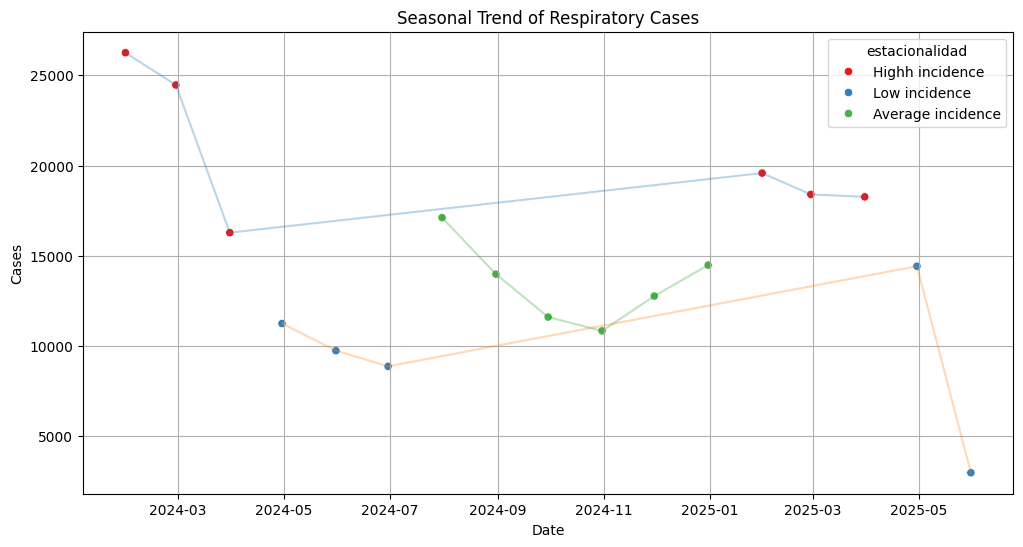

In [56]:
# Calcular media de casos por cluster
cluster_means = df_cluster.groupby('cluster')['casos'].mean().sort_values(ascending=False)

# Mapear automáticamente según media de casos
labels = ['Highh incidence', 'Average incidence', 'Low incidence']
cluster_map = {cluster: labels[i] for i, cluster in enumerate(cluster_means.index)}
df_cluster['estacionalidad'] = df_cluster['cluster'].map(cluster_map)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cluster, x='fecha_sintomas', y='casos', hue='estacionalidad', palette='Set1')
sns.lineplot(data=df_cluster, x='fecha_sintomas', y='casos', hue='estacionalidad', legend=False, alpha=0.3)
plt.title('Seasonal Trend of Respiratory Cases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.grid(True)
plt.show()
